# Preliminaries

In [44]:

from argparse import ArgumentParser
from eval import *
import os
import numpy as np
from omegaconf import OmegaConf
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import DatasetLoader
from train import preliminary
from utils import init_models


# Directly Load Pre-Evaluated Results

*If there are no results to load, run the ***Evaluation Cell*** below.*

## 1. PSNR & SGCS Performance

### 1.1

In [10]:
from eval import *

band = 2.4
filter = 'sd'
datatype = 'sys'

SCENE_PATHS = {
    'conferenceroom': './performance/conferenceroom',
    'bedroom': './performance/bedroom',
    'office': './performance/office',
}

METHOD_PATH_TEMPLATES = {
    'F4CKM': '{scene_path}/{band}GHz_SF_FB_{filter}.npy',
    'NeWRF': './performance/NeWRF/{band}GHz_MIMO_NeWRF_{scene}.npy',
    'NeRF2': './performance/NeRF2/{band}GHz_MIMO_NeRF2_{scene}.npy',
    'FIRE': './performance/FIRE/{band}GHz_MIMO_FIRE_{scene}.npy',
}

FREQS = [2.4, 3.5, 6.7, 28.0]
FREQ_STR_MAP = {2.4: '2.4', 3.5: '3.5', 6.7: '6.7', 28.0: '28'}

results = {}

for scene in SCENE_PATHS:
    path = f"{SCENE_PATHS[scene]}/SE_perfectCSI.npy"
    rate_ub = load_performance(path, 'rate')
    results[f'rate_list_{scene}_ub'] = rate_ub

for scene in SCENE_PATHS:
    for method in METHOD_PATH_TEMPLATES:
        band_str = FREQ_STR_MAP[2.4]
        path = METHOD_PATH_TEMPLATES[method].format(
            scene_path=SCENE_PATHS[scene], band=band_str, filter=filter, scene=scene)
        snr, sgcs = load_performance(path, datatype)
        rate = load_performance(path, 'rate')
        prefix = 'f4ckm' if method == 'F4CKM' else method.lower()
        results[f'snr_list_{scene}_{prefix}'] = snr
        results[f'sgcs_list_{scene}_{prefix}'] = sgcs
        results[f'rate_list_{scene}_{prefix}'] = rate

scene = 'conferenceroom'
for freq in FREQS:
    freq_str = FREQ_STR_MAP[freq]
    for method in METHOD_PATH_TEMPLATES:
        if method == 'F4CKM':
            path = f"./performance/{scene}/{freq_str}GHz_SF_FB_{filter}.npy"
        elif method == 'NeWRF':
            path = f"./performance/NeWRF/{freq_str}GHz_MIMO_NeWRF_{scene}.npy"
        else:
            path = METHOD_PATH_TEMPLATES[method].format(
                scene_path=SCENE_PATHS[scene], band=freq, filter=filter, scene=scene)
        snr, sgcs = load_performance(path, datatype)
        freq_var = freq_str.replace('.', '_')
        prefix = 'f4ckm' if method == 'F4CKM' else method.lower()
        results[f'snr_list_{freq_var}_{prefix}'] = snr
        results[f'sgcs_list_{freq_var}_{prefix}'] = sgcs

globals().update(results)

==> Simulation results loaded successfully from: ./performance/conferenceroom/SE_perfectCSI.npy
==> Simulation results loaded successfully from: ./performance/bedroom/SE_perfectCSI.npy
==> Simulation results loaded successfully from: ./performance/office/SE_perfectCSI.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/FIRE/2.4GHz_MIMO_FIRE_conferenceroom.npy
==>

### 1.2 Different Environments

In [4]:
from eval import *

band = 2.4
filter = 'sd'
datatype = 'sys'

# F4CKM conference model
path_conference = f'./performance/conferenceroom/{band}GHz_SF_FB_{filter}.npy'
snr_list_conference_f4ckm, sgcs_list_conference_f4ckm = load_performance(path_conference, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_conference_f4ckm)
print(np.percentile(sgcs_list_conference_f4ckm, 10))
# F4CKM bedroom model
path_bedroom = f'./performance/bedroom/{band}GHz_SF_FB_{filter}.npy'
snr_list_bedroom_f4ckm, sgcs_list_bedroom_f4ckm = load_performance(path_bedroom, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_bedroom_f4ckm)
print(np.percentile(sgcs_list_bedroom_f4ckm, 10))
# F4CKM office model
path_office = f'./performance/office/{band}GHz_SF_FB_{filter}.npy'
snr_list_office_f4ckm, sgcs_list_office_f4ckm = load_performance(path_office, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_office_f4ckm)
print(np.percentile(sgcs_list_office_f4ckm, 10))

# NeWRF conference model
path_conference = f'./performance/NeWRF/{band}GHz_MIMO_NeWRF_conferenceroom.npy'
snr_list_conference_newrf, sgcs_list_conference_newrf = load_performance(path_conference, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_conference_newrf)
# NeWRF bedroom model
path_bedroom = f'./performance/NeWRF/{band}GHz_MIMO_NeWRF_bedroom.npy'
snr_list_bedroom_newrf, sgcs_list_bedroom_newrf = load_performance(path_bedroom, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_bedroom_newrf)
# NeWRF office model
path_office = f'./performance/NeWRF/{band}GHz_MIMO_NeWRF_office.npy'
snr_list_office_newrf, sgcs_list_office_newrf = load_performance(path_office, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_office_newrf)

# NeRF2 conference model
path_conference = f'./performance/NeRF2/{band}GHz_MIMO_NeRF2_conferenceroom.npy'
snr_list_conference_nerf2, sgcs_list_conference_nerf2 = load_performance(path_conference, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_conference_nerf2)
# NeRF2 bedroom model
path_bedroom = f'./performance/NeRF2/{band}GHz_MIMO_NeRF2_bedroom.npy'
snr_list_bedroom_nerf2, sgcs_list_bedroom_nerf2 = load_performance(path_bedroom, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_bedroom_nerf2)
# NeRF2 office model
path_office = f'./performance/NeRF2/{band}GHz_MIMO_NeRF2_office.npy'
snr_list_office_nerf2, sgcs_list_office_nerf2 = load_performance(path_office, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_office_nerf2)

# FIRE conference model
path_conference = f'./performance/FIRE/{band}GHz_MIMO_FIRE_conferenceroom.npy'
snr_list_conference_fire, sgcs_list_conference_fire = load_performance(path_conference, datatype)
# FIRE bedroom model
path_bedroom = f'./performance/FIRE/{band}GHz_MIMO_FIRE_bedroom.npy'
snr_list_bedroom_fire, sgcs_list_bedroom_fire = load_performance(path_bedroom, datatype)
# FIRE office model
path_office = f'./performance/FIRE/{band}GHz_MIMO_FIRE_office.npy'
snr_list_office_fire, sgcs_list_office_fire = load_performance(path_office, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
median: 19.24
0.9768417
==> Simulation results loaded successfully from: ./performance/bedroom/2.4GHz_SF_FB_sd.npy
median: 17.13
0.98190135
==> Simulation results loaded successfully from: ./performance/office/2.4GHz_SF_FB_sd.npy
median: 17.40
0.976744
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_conferenceroom.npy
median: 6.90
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_bedroom.npy
median: 6.68
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_office.npy
median: 7.50
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom.npy
median: 10.29
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom.npy
median: 6.76
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz

### 1.3 Different Frequency Bands

In [5]:
from eval import *

datatype = 'sys'

# F4CKM 3.5GHz model
path_3_5 = f'./performance/conferenceroom/3.5GHz_SF_FB_sd.npy'
snr_list_3_5_f4ckm, sgcs_list_3_5_f4ckm = load_performance(path_3_5, datatype)
# F4CKM 6.7GHz model
path_6_7 = f'./performance/conferenceroom/6.7GHz_SF_FB_sd.npy'
snr_list_6_7_f4ckm, sgcs_list_6_7_f4ckm = load_performance(path_6_7, datatype)
# F4CKM 28GHz model
path_28 = f'./performance/conferenceroom/28GHz_SF_FB_sd.npy'
snr_list_28_f4ckm, sgcs_list_28_f4ckm = load_performance(path_28, datatype)

# NeWRF 3.5GHz model
path_3_5 = f'./performance/NeWRF/3.5GHz_MIMO_NeWRF_conferenceroom.npy'
snr_list_3_5_newrf, sgcs_list_3_5_newrf = load_performance(path_3_5, datatype)
# NeWRF 6.7GHz model
path_6_7 = f'./performance/NeWRF/6.7GHz_MIMO_NeWRF_conferenceroom.npy'
snr_list_6_7_newrf, sgcs_list_6_7_newrf = load_performance(path_6_7, datatype)
# NeWRF 28GHz model
path_28 = f'./performance/NeWRF/28GHz_MIMO_NeWRF_conferenceroom.npy'
snr_list_28_newrf, sgcs_list_28_newrf = load_performance(path_28, datatype)

# NeRF2 3.5GHz model
path_3_5 = f'./performance/NeRF2/3.5GHz_MIMO_NeRF2_conferenceroom.npy'
snr_list_3_5_nerf2, sgcs_list_3_5_nerf2 = load_performance(path_3_5, datatype)
# NeRF2 6.7GHz model
path_6_7 = f'./performance/NeRF2/6.7GHz_MIMO_NeRF2_conferenceroom.npy'
snr_list_6_7_nerf2, sgcs_list_6_7_nerf2 = load_performance(path_6_7, datatype)
# NeRF2 28GHz model
path_28 = f'./performance/NeRF2/28.0GHz_MIMO_NeRF2_conferenceroom.npy'
snr_list_28_nerf2, sgcs_list_28_nerf2 = load_performance(path_28, datatype)

# FIRE 3.5GHz model
path_3_5 = f'./performance/FIRE/3.5GHz_MIMO_FIRE_conferenceroom.npy'
snr_list_3_5_fire, sgcs_list_3_5_fire = load_performance(path_3_5, datatype)
# FIRE 6.7GHz model
path_6_7 = f'./performance/FIRE/6.7GHz_MIMO_FIRE_conferenceroom.npy'
snr_list_6_7_fire, sgcs_list_6_7_fire = load_performance(path_6_7, datatype)
# FIRE 28GHz model
path_28 = f'./performance/FIRE/28.0GHz_MIMO_FIRE_conferenceroom.npy'
snr_list_28_fire, sgcs_list_28_fire = load_performance(path_28, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/3.5GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/6.7GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/28GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/3.5GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/6.7GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/28GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/3.5GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/6.7GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/28.0GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/FIRE/3.5

### 1.4

In [38]:
print(f'F4CKM || PSNR: {np.mean(snr_list_conference_f4ckm):.2f} dB, SGCS: {np.mean(sgcs_list_conference_f4ckm):.4f}')
print(f'NeWRF || PSNR: {np.mean(snr_list_conference_newrf):.2f} dB, SGCS: {np.mean(sgcs_list_conference_newrf):.4f}')
print(f'NeRF2 || PSNR: {np.mean(snr_list_conference_nerf2):.2f} dB, SGCS: {np.mean(sgcs_list_conference_nerf2):.4f}')
print(f'FIRE || PSNR: {np.mean(snr_list_conference_fire):.2f} dB, SGCS: {np.mean(sgcs_list_conference_fire):.4f}')

F4CKM || PSNR: 18.35 dB, SGCS: 0.9882
NeWRF || PSNR: 5.54 dB, SGCS: 0.8372
NeRF2 || PSNR: 9.95 dB, SGCS: 0.9446
FIRE || PSNR: 1.68 dB, SGCS: 0.5362


## 2. Environment Transfer

In [35]:
from eval import load_performance

num_epoch = 30

"""F4CKM"""
path_f4ckm_bedroom = f'./performance/bedroom/trans_2.4GHz_SF_FB_sd.npy'
path_f4ckm_office = f'./performance/office/trans_2.4GHz_SF_FB_sd.npy'
trans_f4ckm_bedroom = load_performance(path_f4ckm_bedroom, 'trans')
trans_f4ckm_office = load_performance(path_f4ckm_office, 'trans')
path_f4ckm_bedroom = f'./performance/bedroom/ntrans_2.4GHz_SF_FB_sd.npy'
path_f4ckm_office = f'./performance/office/ntrans_2.4GHz_SF_FB_sd.npy'
ntrans_f4ckm_bedroom = load_performance(path_f4ckm_bedroom, 'trans')
ntrans_f4ckm_office = load_performance(path_f4ckm_office, 'trans')
path_bedroom = f'./performance/bedroom/2.4GHz_SF_FB_sd.npy'
path_office = f'./performance/office/2.4GHz_SF_FB_sd.npy'
snr_list_bedroom_f4ckm, _ = load_performance(path_bedroom, 'sys')
snr_list_office_f4ckm, _ = load_performance(path_office, 'sys')
upper_f4ckm_bedroom = np.full(num_epoch, np.mean(snr_list_bedroom_f4ckm))
upper_f4ckm_office = np.full(num_epoch, np.mean(snr_list_office_f4ckm))
"""NeRF2"""
path_nerf2_bedroom = f'./performance/bedroom/trans_2.4GHz_MIMO_nerf2.npy'
path_nerf2_office = f'./performance/office/trans_2.4GHz_MIMO_nerf2.npy'
trans_nerf2_bedroom = load_performance(path_nerf2_bedroom, 'trans')
trans_nerf2_office = load_performance(path_nerf2_office, 'trans')
path_nerf2_bedroom = f'./performance/bedroom/ntrans_2.4GHz_MIMO_nerf2.npy'
path_nerf2_office = f'./performance/office/ntrans_2.4GHz_MIMO_nerf2.npy'
ntrans_nerf2_bedroom = load_performance(path_nerf2_bedroom, 'trans')
ntrans_nerf2_office = load_performance(path_nerf2_office, 'trans')
path_bedroom = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom.npy'
path_office = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_office.npy'
snr_list_bedroom_nerf2, _ = load_performance(path_bedroom, 'sys')
snr_list_office_nerf2, _ = load_performance(path_office, 'sys')
upper_nerf2_bedroom = np.full(num_epoch, np.mean(snr_list_bedroom_nerf2))
upper_nerf2_office = np.full(num_epoch, np.mean(snr_list_office_nerf2))
"""NeWRF"""
path_newrf_bedroom = f'./performance/bedroom/trans_2.4GHz_MIMO_newrf.npy'
path_newrf_office = f'./performance/office/trans_2.4GHz_MIMO_newrf.npy'
trans_newrf_bedroom = load_performance(path_newrf_bedroom, 'trans')
trans_newrf_office = load_performance(path_newrf_office, 'trans')
path_newrf_bedroom = f'./performance/bedroom/ntrans_2.4GHz_MIMO_newrf.npy'
path_newrf_office = f'./performance/office/ntrans_2.4GHz_MIMO_newrf.npy'
ntrans_newrf_bedroom = load_performance(path_newrf_bedroom, 'trans')
ntrans_newrf_office = load_performance(path_newrf_office, 'trans')
path_bedroom = f'./performance/NeWRF/2.4GHz_MIMO_NeWRF_bedroom.npy'
path_office = f'./performance/NeWRF/2.4GHz_MIMO_NeWRF_office.npy'
snr_list_bedroom_newrf, _ = load_performance(path_bedroom, 'sys')
snr_list_office_newrf, _ = load_performance(path_office, 'sys')
upper_newrf_bedroom = np.full(num_epoch, np.mean(snr_list_bedroom_newrf))
upper_newrf_office = np.full(num_epoch, np.mean(snr_list_office_newrf))
"""FIRE"""
path_fire_bedroom = f'./performance/bedroom/trans_2.4GHz_MIMO_fire.npy'
path_fire_office = f'./performance/office/trans_2.4GHz_MIMO_fire.npy'
trans_fire_bedroom = load_performance(path_fire_bedroom, 'trans')
trans_fire_office = load_performance(path_fire_office, 'trans')
path_fire_bedroom = f'./performance/bedroom/ntrans_2.4GHz_MIMO_fire.npy'
path_fire_office = f'./performance/office/ntrans_2.4GHz_MIMO_fire.npy'
ntrans_fire_bedroom = load_performance(path_fire_bedroom, 'trans')
ntrans_fire_office = load_performance(path_fire_office, 'trans')
path_bedroom = f'./performance/FIRE/2.4GHz_MIMO_FIRE_bedroom.npy'
path_office = f'./performance/FIRE/2.4GHz_MIMO_FIRE_office.npy'
snr_list_bedroom_fire, _ = load_performance(path_bedroom, 'sys')
snr_list_office_fire, _ = load_performance(path_office, 'sys')
upper_fire_bedroom = np.full(num_epoch, np.mean(snr_list_bedroom_fire))
upper_fire_office = np.full(num_epoch, np.mean(snr_list_office_fire))

==> Simulation results loaded successfully from: ./performance/bedroom/trans_2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/office/trans_2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/bedroom/ntrans_2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/office/ntrans_2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/bedroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/office/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/bedroom/trans_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/office/trans_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/bedroom/ntrans_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/office/ntrans_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded succe

## 4. Shaping Filter Performance

### 4.1 Simulated Dataset

In [13]:
from eval import load_performance

model_tag = '2.4GHz_SF_FB'
datatype = 'filter'

# NeWRF
path_newrf_conf = f'./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_newrf.npy'
train_newrf_conf, val_newrf_conf = load_performance(path_newrf_conf, datatype)
# NeRF2
path_nerf2_conf = f'./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_nerf2.npy'
train_nerf2_conf, val_nerf2_conf = load_performance(path_nerf2_conf, datatype)
# FIRE
path_fire_conf = f'./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_fire.npy'
train_fire_conf, val_fire_conf = load_performance(path_fire_conf, datatype)
# F4CKM w/o shaping filter
path_n_conf = f'./performance/conferenceroom/shapingfilter_{model_tag}_n.npy'
train_n_conf, val_n_conf = load_performance(path_n_conf, datatype)
# F4CKM full model
path_sd_conf = f'./performance/conferenceroom/shapingfilter_{model_tag}_sd.npy'
train_sd_conf, val_sd_conf = load_performance(path_sd_conf, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_newrf.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_fire.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_SF_FB_n.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_SF_FB_sd.npy


### 4.2 Real-World Dataset

In [32]:
from eval import load_performance

model_tag = '2.4GHz_SF_FB'
datatype = 'filter'

"""argos"""
# NeRF2
path_nerf2_argos = f'./performance/argos/shapingfilter_2.4GHz_MIMO_nerf2.npy'
train_nerf2_argos, val_nerf2_argos = load_performance(path_nerf2_argos, datatype)
# FIRE
path_fire_argos = f'./performance/argos/shapingfilter_2.4GHz_MIMO_fire.npy'
train_fire_argos, val_fire_argos = load_performance(path_fire_argos, datatype)
# F4CKM w/o shaping filter
path_n_argos = f'./performance/argos/shapingfilter_{model_tag}_n.npy'
train_n_argos, val_n_argos = load_performance(path_n_argos, datatype)
# F4CKM full model
path_sd_argos = f'./performance/argos/shapingfilter_{model_tag}_sd.npy'
train_sd_argos, val_sd_argos = load_performance(path_sd_argos, datatype)

==> Simulation results loaded successfully from: ./performance/argos/shapingfilter_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/argos/shapingfilter_2.4GHz_MIMO_fire.npy
==> Simulation results loaded successfully from: ./performance/argos/shapingfilter_2.4GHz_SF_FB_n.npy
==> Simulation results loaded successfully from: ./performance/argos/shapingfilter_2.4GHz_SF_FB_sd.npy


## 5. PSNR & SGCS Performance on Argos Dataset

In [45]:
from eval import *

datatype = 'sys'

# ours
path_f4ckm = f'./performance/argos/2.4GHz_SF_FB_Argos_sd.npy'
snr_list_f4ckm, sgcs_list_f4ckm = load_performance(path_f4ckm, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_f4ckm)
print(f'F4CKM || PSNR: {np.mean(snr_list_f4ckm):.2f} dB, SGCS: {np.mean(sgcs_list_f4ckm):.4f}')
print(f'upper_whisker: {upper_whisker:.2f}')
print(f'upper_quartile: {upper_quartile:.2f}')
print(f'median: {median:.2f}')
print(f'lower_quartile: {lower_quartile:.2f}')
print(f'lower_whisker: {lower_whisker:.2f}')
print(np.percentile(sgcs_list_f4ckm, 0))
# NeRF2
path_nerf2 = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_Argos.npy'
snr_list_nerf2, sgcs_list_nerf2 = load_performance(path_nerf2, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_nerf2)
print(f'NeRF2 || PSNR: {np.mean(snr_list_nerf2):.2f} dB, SGCS: {np.mean(sgcs_list_nerf2):.4f}')
print(f'upper_whisker: {upper_whisker:.2f}')
print(f'upper_quartile: {upper_quartile:.2f}')
print(f'median: {median:.2f}')
print(f'lower_quartile: {lower_quartile:.2f}')
print(f'lower_whisker: {lower_whisker:.2f}')
# FIRE
path_fire = f'./performance/FIRE/2.4GHz_MIMO_FIRE_argos.npy'
snr_list_fire, sgcs_list_fire = load_performance(path_fire, datatype)
upper_whisker, upper_quartile, median, lower_quartile, lower_whisker = calculate_boxplot(snr_list_fire)
print(f'FIRE || PSNR: {np.mean(snr_list_fire):.2f} dB, SGCS: {np.mean(sgcs_list_fire):.4f}')
print(f'upper_whisker: {upper_whisker:.2f}')
print(f'upper_quartile: {upper_quartile:.2f}')
print(f'median: {median:.2f}')
print(f'lower_quartile: {lower_quartile:.2f}')
print(f'lower_whisker: {lower_whisker:.2f}')

==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd.npy
median: 31.26
F4CKM || PSNR: 30.80 dB, SGCS: 0.9993
upper_whisker: 34.52
upper_quartile: 31.97
median: 31.26
lower_quartile: 30.26
lower_whisker: 27.71
0.96523196
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_Argos.npy
median: 22.70
NeRF2 || PSNR: 21.51 dB, SGCS: 0.9880
upper_whisker: 28.11
upper_quartile: 23.70
median: 22.70
lower_quartile: 20.76
lower_whisker: 16.35
==> Simulation results loaded successfully from: ./performance/FIRE/2.4GHz_MIMO_FIRE_argos.npy
median: 15.44
FIRE || PSNR: 14.47 dB, SGCS: 0.9767
upper_whisker: 26.46
upper_quartile: 17.79
median: 15.44
lower_quartile: 12.01
lower_whisker: 3.34


## 6. Imperfect Uplink CSI

In [30]:
from eval import *

datatype = 'esnr'
esnr_tab = [0, 3, 6, 9, 12, 15, 18]
num_group = len(esnr_tab)

# F4CKM
path_f4ckm_argos = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_ESNR.npy'
rate_list_f4ckm_argos = load_performance(path_f4ckm_argos, 'rate')
rate_mean_f4ckm_argos = ([np.mean(group) for group in rate_list_f4ckm_argos])
path_f4ckm_argos = f'./performance/argos/2.4GHz_SF_FB_Argos_sd.npy'
rate_list_f4ckm_argos = load_performance(path_f4ckm_argos, 'rate')
rate_mean_argos = np.mean(rate_list_f4ckm_argos)
rate_ub_f4ckm_argos = np.ones(num_group) * rate_mean_argos
path_f4ckm_conference = f'./performance/conferenceroom/2.4GHz_SF_FB_sd_ESNR.npy'
rate_list_f4ckm_conference = load_performance(path_f4ckm_conference, 'rate')
rate_mean_f4ckm_conference = ([np.mean(group) for group in rate_list_f4ckm_conference])
path_f4ckm_conference = f'./performance/conferenceroom/2.4GHz_SF_FB_sd.npy'
rate_list_f4ckm_conference = load_performance(path_f4ckm_conference, 'rate')
rate_mean_conference = np.mean(rate_list_f4ckm_conference)
rate_ub_f4ckm_conference = np.ones(num_group) * rate_mean_conference
path_f4ckm_bedroom = f'./performance/bedroom/2.4GHz_SF_FB_sd_ESNR.npy'
rate_list_f4ckm_bedroom = load_performance(path_f4ckm_bedroom, 'rate')
rate_mean_f4ckm_bedroom = ([np.mean(group) for group in rate_list_f4ckm_bedroom])
path_f4ckm_bedroom = f'./performance/bedroom/2.4GHz_SF_FB_sd.npy'
rate_list_f4ckm_bedroom = load_performance(path_f4ckm_bedroom, 'rate')
rate_mean_bedroom = np.mean(rate_list_f4ckm_bedroom)
rate_ub_f4ckm_bedroom = np.ones(num_group) * rate_mean_bedroom
path_f4ckm_office = f'./performance/office/2.4GHz_SF_FB_sd_ESNR.npy'
rate_list_f4ckm_office = load_performance(path_f4ckm_office, 'rate')
rate_mean_f4ckm_office = ([np.mean(group) for group in rate_list_f4ckm_office])
path_f4ckm_office = f'./performance/office/2.4GHz_SF_FB_sd.npy'
rate_list_f4ckm_office = load_performance(path_f4ckm_office, 'rate')
rate_mean_office = np.mean(rate_list_f4ckm_office)
rate_ub_f4ckm_office = np.ones(num_group) * rate_mean_office

# NeRF2
path_nerf2_argos = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_argos_ESNR.npy'
rate_list_nerf2_argos = load_performance(path_nerf2_argos, 'rate')
rate_mean_nerf2_argos = ([np.mean(group) for group in rate_list_nerf2_argos])
path_nerf2_argos = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_Argos.npy'
rate_list_nerf2_argos = load_performance(path_nerf2_argos, 'rate')
rate_mean_argos = np.mean(rate_list_nerf2_argos)
rate_ub_nerf2_argos = np.ones(num_group) * rate_mean_argos
path_nerf2_conference = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom_ESNR.npy'
rate_list_nerf2_conference = load_performance(path_nerf2_conference, 'rate')
rate_mean_nerf2_conference = ([np.mean(group) for group in rate_list_nerf2_conference])
path_nerf2_conference = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom.npy'
rate_list_nerf2_conference = load_performance(path_nerf2_conference, 'rate')
rate_mean_conference = np.mean(rate_list_nerf2_conference)
rate_ub_nerf2_conference = np.ones(num_group) * rate_mean_conference
path_nerf2_bedroom = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom_ESNR.npy'
rate_list_nerf2_bedroom = load_performance(path_nerf2_bedroom, 'rate')
rate_mean_nerf2_bedroom = ([np.mean(group) for group in rate_list_nerf2_bedroom])
path_nerf2_bedroom = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom.npy'
rate_list_nerf2_bedroom = load_performance(path_nerf2_bedroom, 'rate')
rate_mean_bedroom = np.mean(rate_list_nerf2_bedroom)
rate_ub_nerf2_bedroom = np.ones(num_group) * rate_mean_bedroom
path_nerf2_office = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_office_ESNR.npy'
rate_list_nerf2_office = load_performance(path_nerf2_office, 'rate')
rate_mean_nerf2_office = ([np.mean(group) for group in rate_list_nerf2_office])
path_nerf2_office = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_office.npy'
rate_list_nerf2_office = load_performance(path_nerf2_office, 'rate')
rate_mean_office = np.mean(rate_list_nerf2_office)
rate_ub_nerf2_office = np.ones(num_group) * rate_mean_office

# FIRE
path_fire_argos = f'./performance/FIRE/2.4GHz_MIMO_FIRE_argos_ESNR.npy'
rate_list_fire_argos = load_performance(path_fire_argos, 'rate')
rate_mean_fire_argos = ([np.mean(group) for group in rate_list_fire_argos])
path_fire_argos = f'./performance/FIRE/2.4GHz_MIMO_FIRE_argos.npy'
rate_list_fire_argos = load_performance(path_fire_argos, 'rate')
rate_mean_argos = np.mean(rate_list_fire_argos)
rate_ub_fire_argos = np.ones(num_group) * rate_mean_argos
path_fire_conference = f'./performance/FIRE/2.4GHz_MIMO_FIRE_conferenceroom_ESNR.npy'
rate_list_fire_conference = load_performance(path_fire_conference, 'rate')
rate_mean_fire_conference = ([np.mean(group) for group in rate_list_fire_conference])
path_fire_conference = f'./performance/FIRE/2.4GHz_MIMO_FIRE_conferenceroom.npy'
rate_list_fire_conference = load_performance(path_fire_conference, 'rate')
rate_mean_conference = np.mean(rate_list_fire_conference)
rate_ub_fire_conference = np.ones(num_group) * rate_mean_conference
path_fire_bedroom = f'./performance/FIRE/2.4GHz_MIMO_FIRE_bedroom_ESNR.npy'
rate_list_fire_bedroom = load_performance(path_fire_bedroom, 'rate')
rate_mean_fire_bedroom = ([np.mean(group) for group in rate_list_fire_bedroom])
path_fire_bedroom = f'./performance/FIRE/2.4GHz_MIMO_FIRE_bedroom.npy'
rate_list_fire_bedroom = load_performance(path_fire_bedroom, 'rate')
rate_mean_bedroom = np.mean(rate_list_fire_bedroom)
rate_ub_fire_bedroom = np.ones(num_group) * rate_mean_bedroom
path_fire_office = f'./performance/FIRE/2.4GHz_MIMO_FIRE_office_ESNR.npy'
rate_list_fire_office = load_performance(path_fire_office, 'rate')
rate_mean_fire_office = ([np.mean(group) for group in rate_list_fire_office])
path_fire_office = f'./performance/FIRE/2.4GHz_MIMO_FIRE_office.npy'
rate_list_fire_office = load_performance(path_fire_office, 'rate')
rate_mean_office = np.mean(rate_list_fire_office)
rate_ub_fire_office = np.ones(num_group) * rate_mean_office

==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_ESNR.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd_ESNR.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/bedroom/2.4GHz_SF_FB_sd_ESNR.npy
==> Simulation results loaded successfully from: ./performance/bedroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/office/2.4GHz_SF_FB_sd_ESNR.npy
==> Simulation results loaded successfully from: ./performance/office/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_argos_ESNR.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_Argos.npy
==> Simulation results loaded suc

## 7. Prediction Example

In [34]:
from eval import *

datatype = 'eg'

# argos
path_argos = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_eg.npy'
input_argos, pred_argos, label_argos = load_performance(path_argos, datatype)
# conferenceroom
path_conference = f'./performance/conferenceroom/2.4GHz_SF_FB_sd_eg.npy'
input_conference, pred_conference, label_conference = load_performance(path_conference, datatype)

# antenna-wise piece
input_argos_piece = input_argos[0, :, 0, 0]
pred_argos_piece = pred_argos[0, :, 0, 0]
label_argos_piece = label_argos[0, :, 0, 0]

input_conference_piece = input_conference[0, :, 0, 0]
pred_conference_piece = pred_conference[0, :, 0, 0]
label_conference_piece = label_conference[0, :, 0, 0]

# amplitude
amp_input_argos = np.abs(input_argos_piece)
amp_pred_argos = np.abs(pred_argos_piece)
amp_label_argos = np.abs(label_argos_piece)

amp_input_conference = np.abs(input_conference_piece)
amp_pred_conference = np.abs(pred_conference_piece)
amp_label_conference = np.abs(label_conference_piece)

# phase
phase_input_argos = np.angle(input_argos_piece)
phase_pred_argos = np.angle(pred_argos_piece)
phase_label_argos = np.angle(label_argos_piece)

phase_input_conference = np.angle(input_conference_piece)
phase_pred_conference = np.angle(pred_conference_piece)
phase_label_conference = np.angle(label_conference_piece)

==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_eg.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd_eg.npy


## 8. Ablation Study

### 8.1 system level performance

In [23]:

datatype = 'sys'

"""argos dataset"""
# F4CKM full model
path_argos_full = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wonsfg.npy'
snr_list_argos_full, sgcs_list_argos_full = load_performance(path_argos_full, datatype)
# F4CKM w/o SFG sampling
path_argos_wosfg = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wosfg.npy'
snr_list_argos_wosfg, sgcs_list_argos_wosfg = load_performance(path_argos_wosfg, datatype)
# F4CKM w/o FCA modules
path_argos_wofca = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wofca.npy'
snr_list_argos_wofca, sgcs_list_argos_wofca = load_performance(path_argos_wofca, datatype)
# F4CKM w/o CNN backbone
path_argos_wocnn = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wocnn.npy'
snr_list_argos_wocnn, sgcs_list_argos_wocnn = load_performance(path_argos_wocnn, datatype)
# F4CKM w/o shaping filter
path_argos_wosf = f'./performance/argos/2.4GHz_SF_FB_Argos_n.npy'
snr_list_argos_wosf, sgcs_list_argos_wosf = load_performance(path_argos_wosf, datatype)
# NeRF2
path_argos_nerf2 = f'./performance/NeRF2/2.4GHz_MIMO_NeRF2_Argos.npy'
snr_list_argos_nerf2, sgcs_list_argos_nerf2 = load_performance(path_argos_nerf2, datatype)
# FIRE
path_argos_fire = f'./performance/FIRE/2.4GHz_MIMO_FIRE_argos.npy'
snr_list_argos_fire, sgcs_list_argos_fire = load_performance(path_argos_fire, datatype)

==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wonsfg.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wosfg.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wofca.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wocnn.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_n.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_Argos.npy
==> Simulation results loaded successfully from: ./performance/FIRE/2.4GHz_MIMO_FIRE_argos.npy


### 8.2 fast learning

In [40]:
from eval import load_performance

model_tag = '2.4GHz_SF_FB'
datatype = 'fl'

# F4CKM w/o shaping filter and SFG sampling
path_wosf_wosfg_argos = f'./performance/argos/fastlearning_{model_tag}_n_wosfg.npy'
train_wosf_wosfg_argos, val_wosf_wosfg_argos = load_performance(path_wosf_wosfg_argos, datatype)
# F4CKM w/o shaping filter
path_wosf_wsfg_argos = f'./performance/argos/fastlearning_{model_tag}_n_wsfg.npy'
train_wosf_wsfg_argos, val_wosf_wsfg_argos = load_performance(path_wosf_wsfg_argos, datatype)
# F4CKM w/o SFG sampling
path_wsf_wosfg_argos = f'./performance/argos/fastlearning_{model_tag}_sd_wosfg.npy'
train_wsf_wosfg_argos, val_wsf_wosfg_argos = load_performance(path_wsf_wosfg_argos, datatype)
# F4CKM full model
path_wsf_wsfg_argos = f'./performance/argos/fastlearning_{model_tag}_sd_wsfg.npy'
train_wsf_wsfg_argos, val_wsf_wsfg_argos = load_performance(path_wsf_wsfg_argos, datatype)
# NeRF2
path_nerf2_argos = f'./performance/argos/fastlearning_2.4GHz_MIMO_nerf2.npy'
train_nerf2_argos, val_nerf2_argos = load_performance(path_nerf2_argos, datatype)
# FIRE
path_fire_argos = f'./performance/argos/fastlearning_2.4GHz_MIMO_fire.npy'
train_fire_argos, val_fire_argos = load_performance(path_fire_argos, datatype)

==> Simulation results loaded successfully from: ./performance/argos/fastlearning_2.4GHz_SF_FB_n_wosfg.npy
==> Simulation results loaded successfully from: ./performance/argos/fastlearning_2.4GHz_SF_FB_n_wsfg.npy
==> Simulation results loaded successfully from: ./performance/argos/fastlearning_2.4GHz_SF_FB_sd_wosfg.npy
==> Simulation results loaded successfully from: ./performance/argos/fastlearning_2.4GHz_SF_FB_sd_wsfg.npy
==> Simulation results loaded successfully from: ./performance/argos/fastlearning_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/argos/fastlearning_2.4GHz_MIMO_fire.npy


# Plot Cell

## 1. Plot PSNR & SGCS Performance

### 1.1 Different Environments

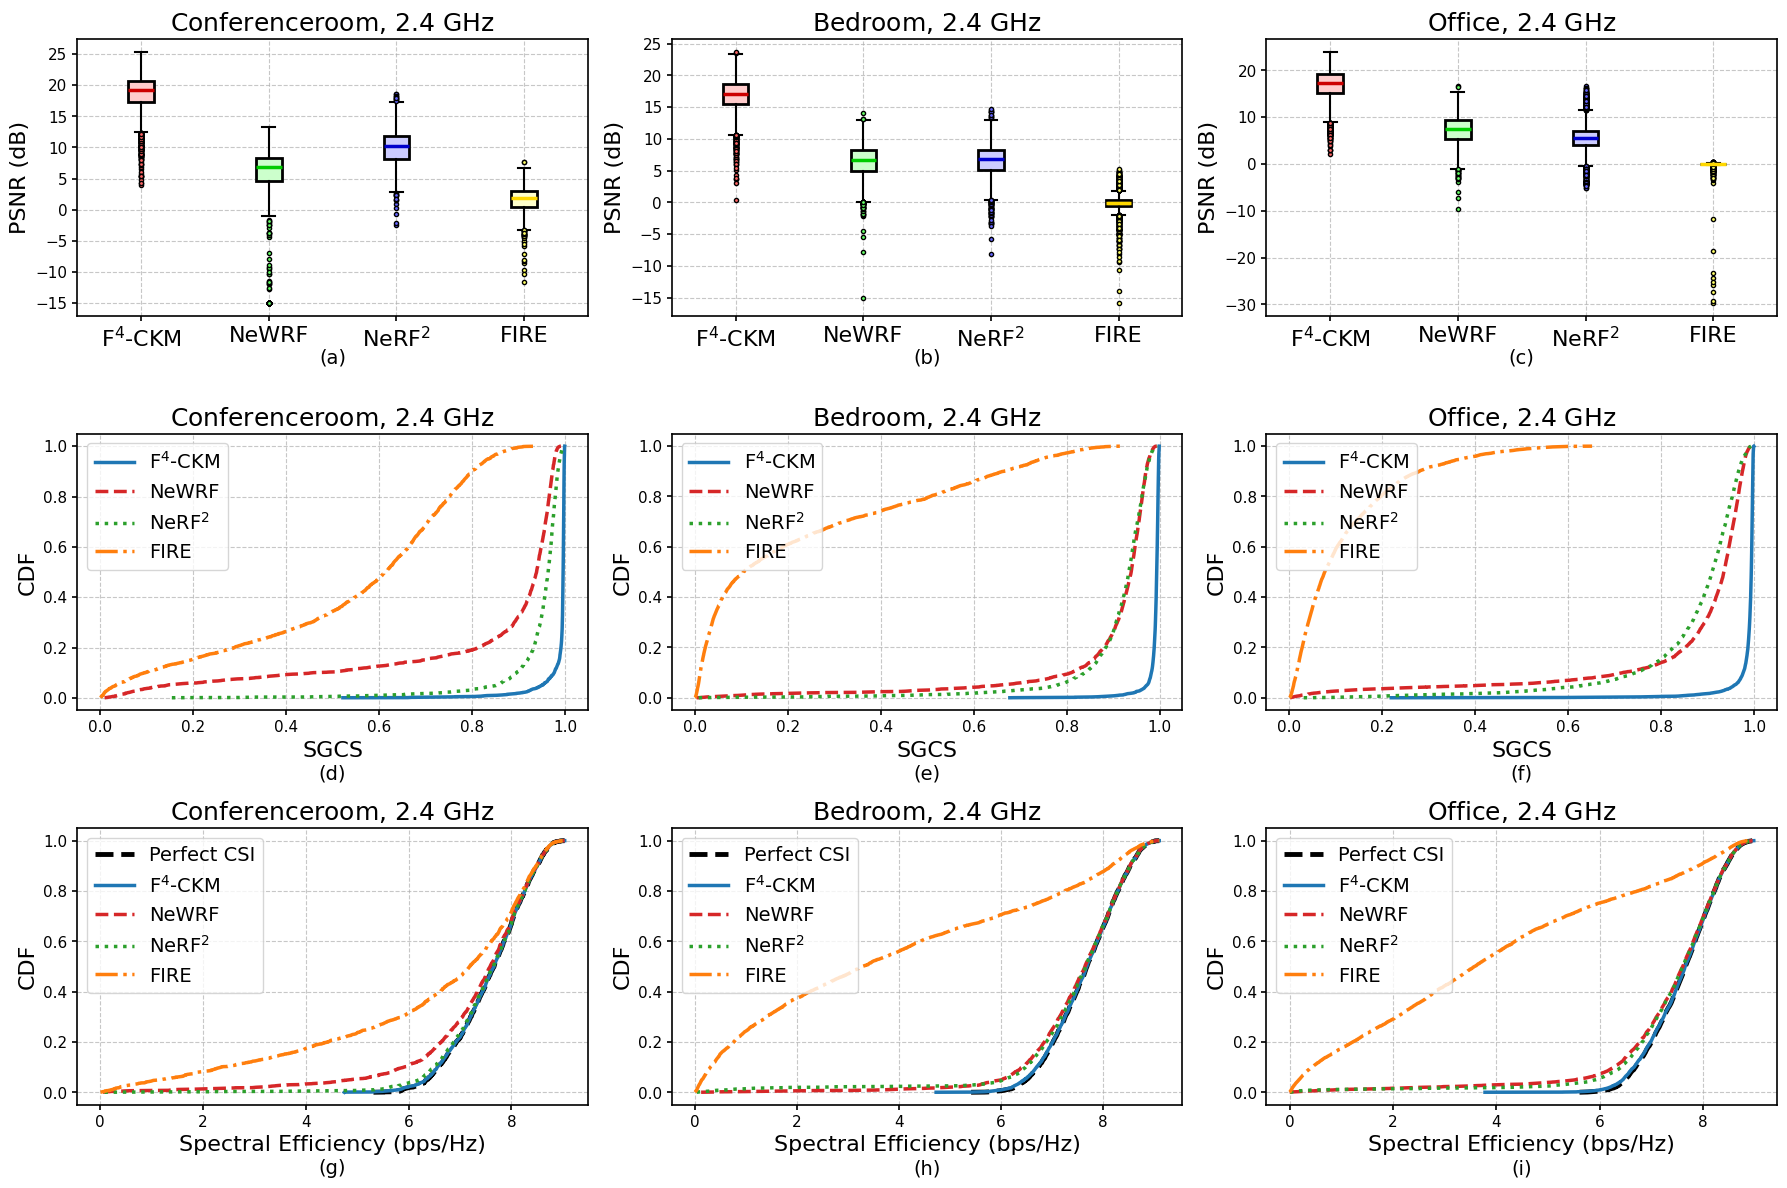

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from visualizer import StyleManager

methods = ['F4CKM', 'NeWRF', 'NeRF2', 'FIRE']
scenes = ['Conferenceroom', 'Bedroom', 'Office']

data = {}
for method in methods:
    data[method] = {}
    for scene in scenes:
        prefix = 'f4ckm' if method == 'F4CKM' else method.lower()
        snr_list = globals()[f'snr_list_{scene.lower()}_{prefix}']
        sgcs_list = globals()[f'sgcs_list_{scene.lower()}_{prefix}']
        rate_list = globals()[f'rate_list_{scene.lower()}_{prefix}']
        if method == 'NeWRF':
            snr_list = np.clip(snr_list, a_min=-15, a_max=None)
        data[method][scene] = {'PSNR': snr_list, 'SGCS': sgcs_list, 'SE': rate_list}
        for metric in ['SGCS', 'SE']:
            cdf_x, cdf_y = cal_cdf(data[method][scene][metric])
            data[method][scene][f'{metric}_cdf'] = (cdf_x, cdf_y)

PLOT_CONFIG = {
    'label_tab': ['F$^4$-CKM', 'NeWRF', 'NeRF$^2$', 'FIRE']
}

fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()

for col, scene in enumerate(scenes):
    ax = axs[col]
    psnr_data = [data[method][scene]['PSNR'] for method in methods]
    bp = ax.boxplot(
        psnr_data,
        tick_labels=PLOT_CONFIG['label_tab'],
        patch_artist=True,
        widths=0.2,
        boxprops=dict(linestyle='-', linewidth=2, edgecolor='black'),
        medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
        whiskerprops=dict(linestyle='-', linewidth=1.5, color='black'),
        capprops=dict(linestyle='-', linewidth=1.5, color='black'),
        flierprops=dict(marker='o', markersize=3, linestyle='none')
    )
    colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC']
    outlier_colors = ['#FF6666', '#66FF66', '#6666FF', '#FFFF66']
    median_colors = ['#CC0000', '#00CC00', '#0000CC', '#FFD800']
    for patch, c in zip(bp['boxes'], colors): patch.set_facecolor(c)
    for flier, c in zip(bp['fliers'], outlier_colors): flier.set_markerfacecolor(c)
    for median, c in zip(bp['medians'], median_colors): median.set_color(c)
    ax.set_title(f'{scene}, $2.4$ GHz', fontsize=18)
    ax.set_ylabel('PSNR (dB)', fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.grid(linestyle='--', alpha=0.7)

for col, scene in enumerate(scenes):
    ax = axs[3 + col]
    for i, method in enumerate(methods):
        cdf_x, cdf_y = data[method][scene]['SGCS_cdf']
        style = StyleManager.get_style(i)
        ax.plot(cdf_x, cdf_y, linestyle=style['linestyle'], color=style['color'], linewidth=2.5, label=PLOT_CONFIG['label_tab'][i])
    ax.set_xlabel('SGCS', fontsize=16)
    ax.set_ylabel('CDF', fontsize=16)
    ax.set_title(f'{scene}, $2.4$ GHz', fontsize=18)
    ax.grid(linestyle='--', alpha=0.7)
    ax.legend(loc=2, fontsize=14)

for col, scene in enumerate(scenes):
    ax = axs[6 + col]
    scene_key = scene.lower().replace(' ', '')
    rate_ub = globals()[f'rate_list_{scene_key}_ub']
    cdf_x_ub, cdf_y_ub = cal_cdf(rate_ub)
    ax.plot(cdf_x_ub, cdf_y_ub, linestyle='--', color='black', linewidth=3.5, label=r'Perfect CSI')
    for i, method in enumerate(methods):
        cdf_x, cdf_y = data[method][scene]['SE_cdf']
        style = StyleManager.get_style(i)
        ax.plot(cdf_x, cdf_y, linestyle=style['linestyle'], color=style['color'], linewidth=2.5, label=PLOT_CONFIG['label_tab'][i])
    ax.set_xlabel('Spectral Efficiency (bps/Hz)', fontsize=16)
    ax.set_ylabel('CDF', fontsize=16)
    ax.set_title(f'{scene}, $2.4$ GHz', fontsize=18)
    ax.grid(linestyle='--', alpha=0.7)
    ax.legend(loc=2, fontsize=14)

labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']
for i in range(3):
    axs[i].text(0.5, -0.17, labels[i], transform=axs[i].transAxes, fontsize=14, ha='center')
for i in range(3, 9):
    axs[i].text(0.5, -0.25, labels[i], transform=axs[i].transAxes, fontsize=14, ha='center')

plt.tight_layout()
# plt.savefig('./Figures/sim_envs_extended.pdf', format='pdf')
plt.show()

### 1.2 Different Frequency Bands

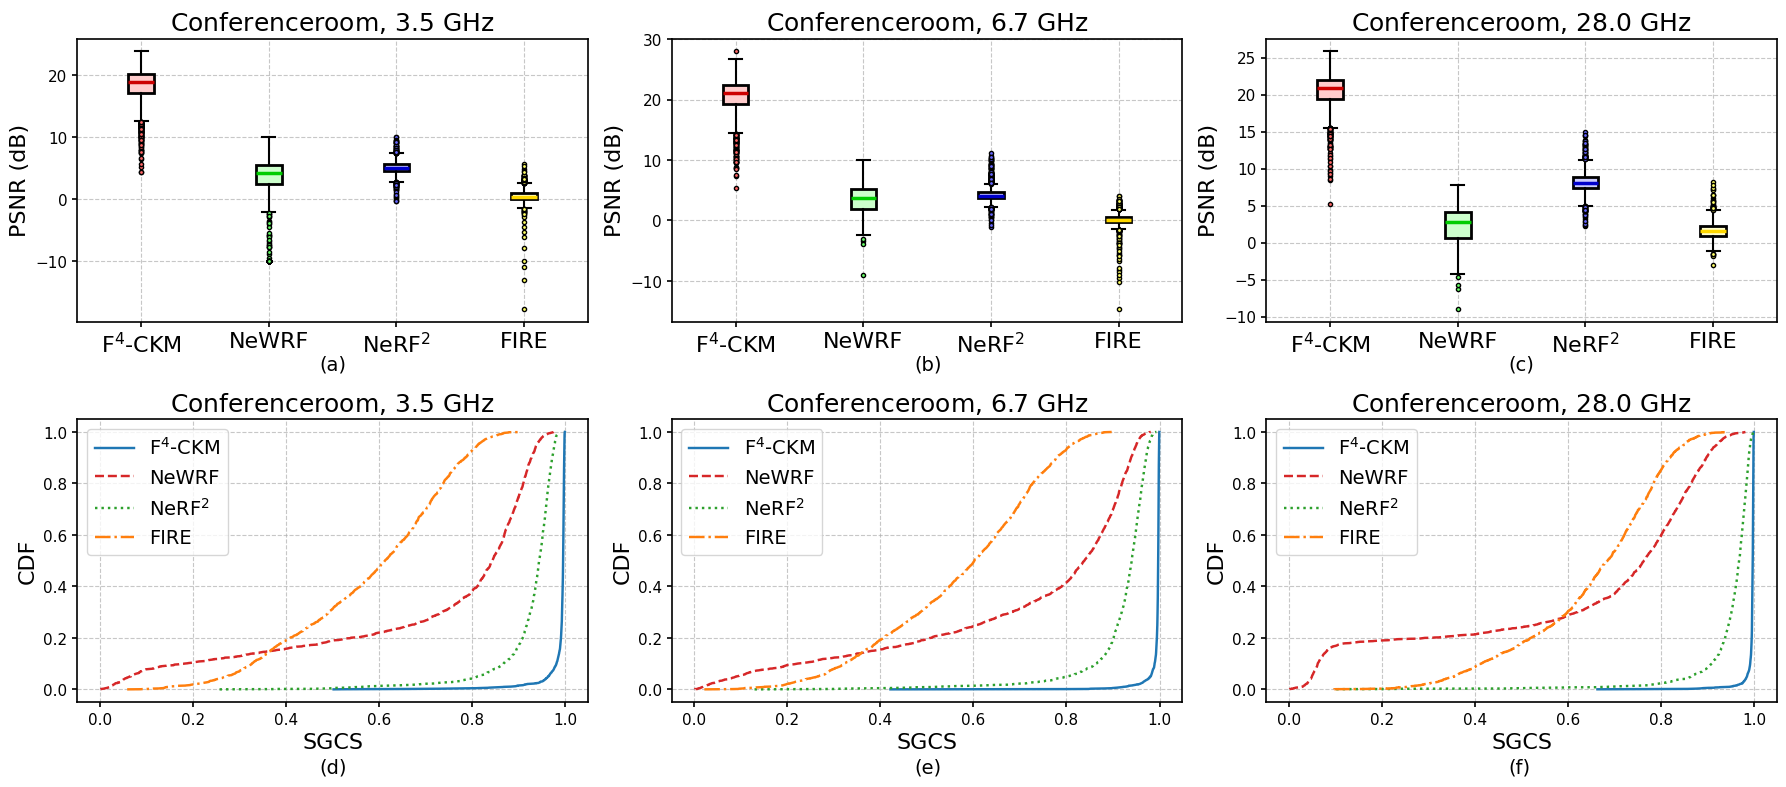

In [39]:
import matplotlib.patches as mpatches
from visualizer import StyleManager

# F4CKM 3.5GHz model
snr_3_5_f4ckm = cal_cdf(snr_list_3_5_f4ckm)
sgcs_3_5_f4ckm = cal_cdf(sgcs_list_3_5_f4ckm)
# F4CKM 6.7GHz model
snr_6_7_f4ckm = cal_cdf(snr_list_6_7_f4ckm)
sgcs_6_7_f4ckm = cal_cdf(sgcs_list_6_7_f4ckm)
# F4CKM 28GHz model
snr_28_f4ckm = cal_cdf(snr_list_28_f4ckm)
sgcs_28_f4ckm = cal_cdf(sgcs_list_28_f4ckm)

# NeWRF 3.5GHz model
snr_3_5_newrf = cal_cdf(snr_list_3_5_newrf)
snr_list_3_5_newrf = np.clip(snr_list_3_5_newrf, min=-10)
sgcs_3_5_newrf = cal_cdf(sgcs_list_3_5_newrf)
# NeWRF 6.7GHz model
snr_6_7_newrf = cal_cdf(snr_list_6_7_newrf)
sgcs_6_7_newrf = cal_cdf(sgcs_list_6_7_newrf)
# NeWRF 28GHz model
snr_28_newrf = cal_cdf(snr_list_28_newrf)
sgcs_28_newrf = cal_cdf(sgcs_list_28_newrf)

# NeRF2 3.5GHz model
snr_3_5_nerf2 = cal_cdf(snr_list_3_5_nerf2)
sgcs_3_5_nerf2 = cal_cdf(sgcs_list_3_5_nerf2)
# NeRF2 6.7GHz model
snr_6_7_nerf2 = cal_cdf(snr_list_6_7_nerf2)
sgcs_6_7_nerf2 = cal_cdf(sgcs_list_6_7_nerf2)
# NeRF2 28GHz model
snr_28_nerf2 = cal_cdf(snr_list_28_nerf2)
sgcs_28_nerf2 = cal_cdf(sgcs_list_28_nerf2)

# FIRE 3.5GHz model
snr_3_5_fire = cal_cdf(snr_list_3_5_fire)
sgcs_3_5_fire = cal_cdf(sgcs_list_3_5_fire)
# FIRE 6.7GHz model
snr_6_7_fire = cal_cdf(snr_list_6_7_fire)
sgcs_6_7_fire = cal_cdf(sgcs_list_6_7_fire)
# FIRE 28GHz model
snr_28_fire = cal_cdf(snr_list_28_fire)
sgcs_28_fire = cal_cdf(sgcs_list_28_fire)

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()  # 将二维数组展平为一维，方便索引

# box-plot styles
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC']  # 浅红、浅绿、浅蓝、浅黄
outlier_colors = ['#FF6666', '#66FF66', '#6666FF', '#FFFF66']  # 离群点颜色
median_colors = ['#CC0000', '#00CC00', '#0000CC', '#FFD800']  # 中位线颜色
legend_patches = [
    mpatches.Patch(color='#FFCCCC', label='F$^4$-CKM (Ours)'),
    mpatches.Patch(color='#CCFFCC', label='NeWRF'),
    mpatches.Patch(color='#CCCCFF', label='NeRF$^2$'),
    mpatches.Patch(color='#FFFFCC', label='FIRE'),]  # 创建图例
boxprops = dict(linestyle='-', linewidth=2, edgecolor='black')  # 箱体边框样式
medianprops = dict(linestyle='-', linewidth=2.5, color='black')  # 中位数线样式
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')  # 须线样式
capprops = dict(linestyle='-', linewidth=1.5, color='black')  # 须线端点样式
flierprops = dict(marker='o', markerfacecolor='r', markersize=3, linestyle='none')  # 离群点样式
widths = 0.2  # 箱体宽度
label_tab = [
    'F$^4$-CKM',
    'NeWRF',
    'NeRF$^2$',
    'FIRE',
]


# 3.5 GHz
bp2 = axs[0].boxplot([snr_list_3_5_f4ckm,
                      snr_list_3_5_newrf,
                      snr_list_3_5_nerf2,
                      snr_list_3_5_fire], tick_labels=label_tab, boxprops=boxprops, widths=widths,
                     medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# set box and point color
for patch, color, outlier_color in zip(bp2['boxes'], colors, outlier_colors):
    patch.set_facecolor(color)
for flier, outlier_color in zip(bp2['fliers'], outlier_colors):
    flier.set_markerfacecolor(outlier_color)
for median, median_color in zip(bp2['medians'], median_colors):
    median.set_color(median_color)
axs[0].set_title('Conferenceroom, $3.5$ GHz', fontsize=18)
axs[0].set_ylabel('PSNR (dB)', fontsize=16)
axs[0].tick_params(axis='x', labelsize=16)
axs[0].grid(linestyle='--', alpha=0.7)
# axs[1].legend(handles=legend_patches, loc=3, fontsize=12)

# 6.7 GHz
bp3 = axs[1].boxplot([snr_list_6_7_f4ckm,
                      snr_list_6_7_newrf,
                      snr_list_6_7_nerf2,
                      snr_list_6_7_fire], tick_labels=label_tab, boxprops=boxprops, widths=widths,
                     medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# set box and point color
for patch, color, outlier_color in zip(bp3['boxes'], colors, outlier_colors):
    patch.set_facecolor(color)
for flier, outlier_color in zip(bp3['fliers'], outlier_colors):
    flier.set_markerfacecolor(outlier_color)
for median, median_color in zip(bp3['medians'], median_colors):
    median.set_color(median_color)
axs[1].set_title('Conferenceroom, $6.7$ GHz', fontsize=18)
axs[1].set_ylabel('PSNR (dB)', fontsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[1].grid(linestyle='--', alpha=0.7)
# axs[2].legend(handles=legend_patches, loc=3, fontsize=12)

# 28 GHz
bp4 = axs[2].boxplot([snr_list_28_f4ckm,
                      snr_list_28_newrf,
                      snr_list_28_nerf2,
                      snr_list_28_fire], tick_labels=label_tab, boxprops=boxprops, widths=widths,
                     medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# set box and point color
for patch, color, outlier_color in zip(bp4['boxes'], colors, outlier_colors):
    patch.set_facecolor(color)
for flier, outlier_color in zip(bp4['fliers'], outlier_colors):
    flier.set_markerfacecolor(outlier_color)
for median, median_color in zip(bp4['medians'], median_colors):
    median.set_color(median_color)
axs[2].set_title('Conferenceroom, $28.0$ GHz', fontsize=18)
axs[2].set_ylabel('PSNR (dB)', fontsize=16)
axs[2].tick_params(axis='x', labelsize=16)
axs[2].grid(linestyle='--', alpha=0.7)
# axs[2].legend(handles=legend_patches, loc=3, fontsize=12)

label_tab = [
    'F$^4$-CKM',
    'NeWRF',
    'NeRF$^2$',
    'FIRE',
]

# 3.5 GHz
for i, data in enumerate([sgcs_3_5_f4ckm, sgcs_3_5_newrf, sgcs_3_5_nerf2, sgcs_3_5_fire]):
    style = StyleManager.get_style(i)
    axs[3].plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=style['linewidth'], label=label_tab[i])
axs[3].set_xlabel('SGCS', fontsize=16)
axs[3].set_ylabel('CDF', fontsize=16)
axs[3].set_title('Conferenceroom, $3.5$ GHz', fontsize=18)
axs[3].grid(linestyle='--', alpha=0.7)
axs[3].legend(loc=2, fontsize=14)

# 6.7 GHz
for i, data in enumerate([sgcs_6_7_f4ckm, sgcs_6_7_newrf, sgcs_6_7_nerf2, sgcs_6_7_fire]):
    style = StyleManager.get_style(i)
    axs[4].plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=style['linewidth'], label=label_tab[i])
axs[4].set_xlabel('SGCS', fontsize=16)
axs[4].set_ylabel('CDF', fontsize=16)
axs[4].set_title('Conferenceroom, $6.7$ GHz', fontsize=18)
axs[4].grid(linestyle='--', alpha=0.7)
axs[4].legend(loc=2, fontsize=14)

# 28 GHz
for i, data in enumerate([sgcs_28_f4ckm, sgcs_28_newrf, sgcs_28_nerf2, sgcs_28_fire]):
    style = StyleManager.get_style(i)
    axs[5].plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=style['linewidth'], label=label_tab[i])
axs[5].set_xlabel('SGCS', fontsize=16)
axs[5].set_ylabel('CDF', fontsize=16)
axs[5].set_title('Conferenceroom, $28.0$ GHz', fontsize=18)
axs[5].grid(linestyle='--', alpha=0.7)
axs[5].legend(loc=2, fontsize=14)

labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i in range(3):
    label = labels[i] 
    axs[i].text(0.475, -0.17, label, transform=axs[i].transAxes, fontsize=14)
    label = labels[3 + i] 
    axs[3 + i].text(0.475, -0.25, label, transform=axs[3 + i].transAxes, fontsize=14)
        
plt.tight_layout()
# plt.savefig('./Figures/sim_frequencies_extended.pdf', format='pdf')
plt.show()

## 2. Plot Environment Transfer Performance

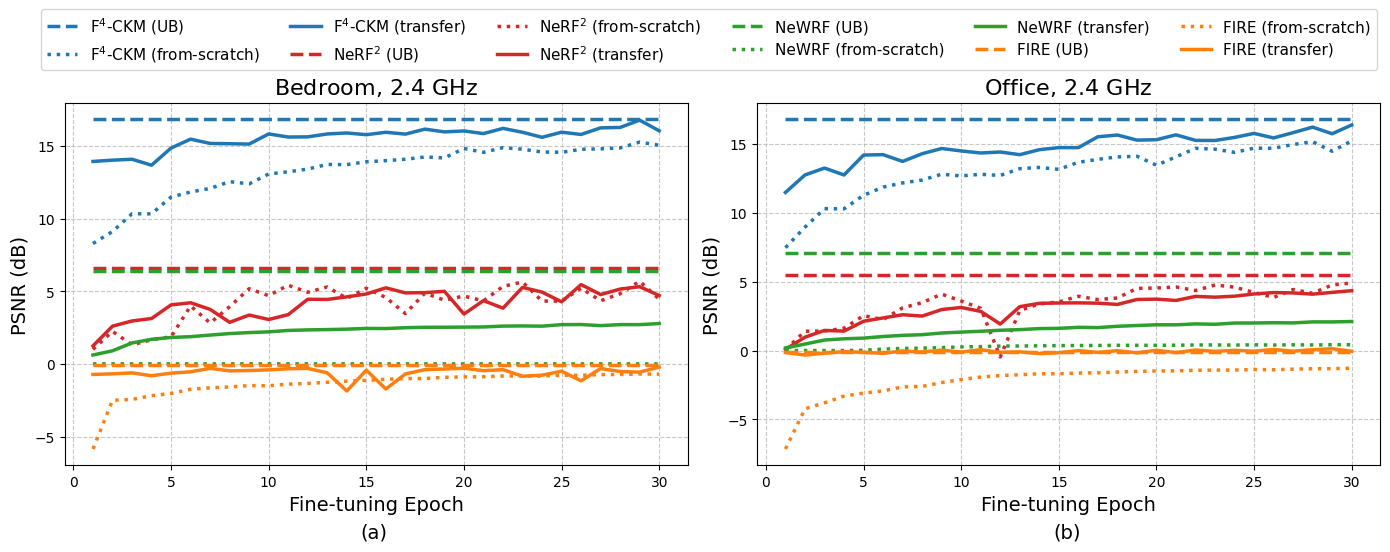

In [37]:

from visualizer import LineStyle, StyleManager

epoch = np.arange(30) + 1

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs = axs.flatten()

label_tab = [
    'F$^4$-CKM (UB)',
    'F$^4$-CKM (from-scratch)',
    'F$^4$-CKM (transfer)',
    'NeRF$^2$ (UB)',
    'NeRF$^2$ (from-scratch)',
    'NeRF$^2$ (transfer)',
    'NeWRF (UB)',
    'NeWRF (from-scratch)',
    'NeWRF (transfer)',
    'FIRE (UB)',
    'FIRE (from-scratch)',
    'FIRE (transfer)',
]

# bedroom
for i, data in enumerate([upper_f4ckm_bedroom, ntrans_f4ckm_bedroom[:30, 0], trans_f4ckm_bedroom[:30, 0],
                          upper_nerf2_bedroom, ntrans_nerf2_bedroom[:30, 0], trans_nerf2_bedroom[:30, 0],
                          upper_newrf_bedroom, ntrans_newrf_bedroom[:30, 1], trans_newrf_bedroom[:30, 1],
                          upper_fire_bedroom, ntrans_fire_bedroom[:30, 0], trans_fire_bedroom[:30, 0]]):
    style = StyleManager.get_style(i, repeat=[1, 1, 3], cycle=[3, 3, 4])
    linestyle = LineStyle.get_style((i + 1) % 3)
    axs[0].plot(epoch, data, linestyle=linestyle, marker=None, color=style['color'], linewidth=2.5, label=label_tab[i])

# office
for i, data in enumerate([upper_f4ckm_office, ntrans_f4ckm_office[:30, 0], trans_f4ckm_office[:30, 0],
                          upper_nerf2_office, ntrans_nerf2_office[:30, 0], trans_nerf2_office[:30, 0],
                          upper_newrf_office, ntrans_newrf_office[:30, 1], trans_newrf_office[:30, 1],
                          upper_fire_office, ntrans_fire_office[:30, 0], trans_fire_office[:30, 0]]):
    style = StyleManager.get_style(i, repeat=[1, 1, 3], cycle=[3, 3, 4])
    linestyle = LineStyle.get_style((i + 1) % 3)
    axs[1].plot(epoch, data, linestyle=linestyle, marker=None, color=style['color'], linewidth=2.5, label=label_tab[i])

for ax, title in zip(axs, ['Bedroom, $2.4$ GHz', 'Office, $2.4$ GHz']):
    ax.set_xlabel('Fine-tuning Epoch', fontsize=14)
    ax.set_ylabel('PSNR (dB)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.grid(linestyle='--', alpha=0.7)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='upper center', 
           bbox_to_anchor=(0.51, 1.12),   # (x=0.5 中心, y=1.02 略高于图)
           ncol=6, 
           fontsize=11,
           frameon=True)

labels = ['(a)', '(b)']
for i in range(1):
    label = labels[i] 
    axs[i].text(0.475, -0.2, label, transform=axs[i].transAxes, fontsize=14)
    label = labels[1 + i] 
    axs[1 + i].text(0.475, -0.2, label, transform=axs[1 + i].transAxes, fontsize=14)
    
plt.tight_layout()
# plt.savefig('./Figures/sim_trans.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## 4. Plot Shaping Filter Performance

In [ ]:
from visualizer import StyleManager

epoch = np.arange(100)

fig, axs = plt.subplots(2, 1, figsize=(7, 10))
axs = axs.flatten()

label_tab = [
    'F$^4$-CKM (with shaping filter)',
    'F$^4$-CKM (without shaping filter)',
    'NeRF$^2$',
    'NeWRF',
    'FIRE'
]

# conferenceroom
for i, data in enumerate([train_sd_conf[:100, 1], train_n_conf[:100, 1], train_nerf2_conf[:100, 1], train_newrf_conf[:100, 1], train_fire_conf[:100, 1]]):
    style = StyleManager.get_style(i)
    axs[0].plot(epoch, data, linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=3, label=label_tab[i])
axs[0].set_xlabel('Epoch', fontsize=14)
axs[0].set_ylabel('Training PSNR (dB)', fontsize=14)
axs[0].set_title('Conferenceroom, $2.4$ GHz', fontsize=16)
axs[0].grid(linestyle='--', alpha=0.7)
axs[0].legend(loc=4, fontsize=11, ncol=3)

label_tab = [
    'F$^4$-CKM (with shaping filter)',
    'F$^4$-CKM (without shaping filter)',
    'NeRF$^2$',
    'FIRE'
]

# argos
for i, data in enumerate([train_sd_argos[:100, 1], train_n_argos[:100, 1], train_nerf2_argos[:100, 1], train_fire_argos[:100, 1]]):
    style = StyleManager.get_style(i)
    axs[1].plot(epoch, data, linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=3, label=label_tab[i])
axs[1].set_xlabel('Epoch', fontsize=14)
axs[1].set_ylabel('Training PSNR (dB)', fontsize=14)
axs[1].set_title('Argos Dataset, $2.4$ GHz', fontsize=16)
axs[1].grid(linestyle='--', alpha=0.7)
axs[1].legend(loc=4, fontsize=11, ncol=2)

labels = ['(a)', '(b)']
for i in range(1):
    label = labels[i] 
    axs[i].text(0.475, -0.2, label, transform=axs[i].transAxes, fontsize=14)
    label = labels[1 + i] 
    axs[1 + i].text(0.475, -0.2, label, transform=axs[1 + i].transAxes, fontsize=14)
    
# 调整布局并显示
plt.tight_layout()
# plt.savefig('./Figures/sim_shapingfilter.pdf', format='pdf')
plt.show()

## 5. Plot PSNR Comparison on Argos Dataset

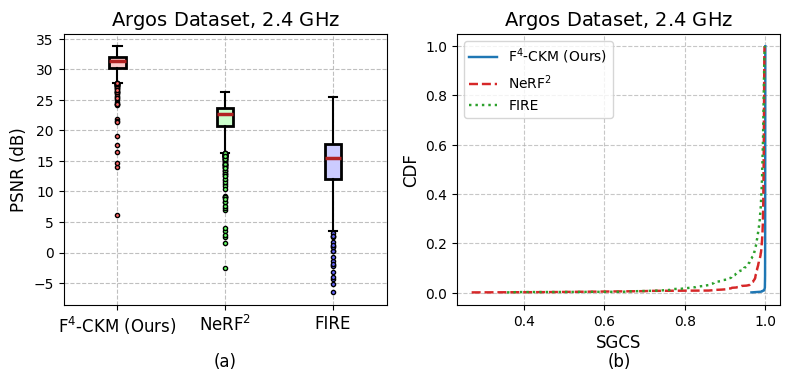

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from visualizer import StyleManager

# ours
snr_f4ckm = cal_cdf(snr_list_f4ckm)
sgcs_f4ckm = cal_cdf(sgcs_list_f4ckm)
# NeRF2
snr_nerf2 = cal_cdf(snr_list_nerf2)
sgcs_nerf2 = cal_cdf(sgcs_list_nerf2)
# FIRE
snr_fire = cal_cdf(snr_list_fire)
sgcs_fire = cal_cdf(sgcs_list_fire)


# 创建 2x2 子图布局
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.flatten()  # 将二维数组展平为一维，方便索引

# box-plot styles
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC']  # 浅红、浅绿、浅蓝、浅黄
outlier_colors = ['#FF6666', '#66FF66', '#6666FF', '#FFD800']  # 离群点颜色
legend_patches = [
    mpatches.Patch(color='#FFCCCC', label='Ours'),
    mpatches.Patch(color='#CCFFCC', label='NeRF2'),
    mpatches.Patch(color='#CCCCFF', label='FIRE'),]  # 创建图例
boxprops = dict(linestyle='-', linewidth=2, edgecolor='black')  # 箱体边框样式
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')  # 中位数线样式
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')  # 须线样式
capprops = dict(linestyle='-', linewidth=1.5, color='black')  # 须线端点样式
flierprops = dict(marker='o', markerfacecolor='r', markersize=3, linestyle='none')  # 离群点样式
widths = 0.15  # 箱体宽度
label_tab = [
    'F$^4$-CKM (Ours)',
    'NeRF$^2$',
    'FIRE',
]

# box-plot of SNR (dB)
bp1 = axs[0].boxplot([snr_list_f4ckm, snr_list_nerf2, snr_list_fire], tick_labels=label_tab, boxprops=boxprops, widths=widths,
                     medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)
# set box and point color
for patch, color, outlier_color in zip(bp1['boxes'], colors, outlier_colors):
    patch.set_facecolor(color)
for flier, outlier_color in zip(bp1['fliers'], outlier_colors):
    flier.set_markerfacecolor(outlier_color)
axs[0].set_title('Argos Dataset, $2.4$ GHz', fontsize=14)
axs[0].set_ylabel('PSNR (dB)', fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].grid(linestyle='--', alpha=0.8)
# axs[1].legend(handles=legend_patches, loc='best', fontsize=10)

label_tab = [
    'F$^4$-CKM (Ours)',
    'NeRF$^2$',
    'FIRE',
]

# CDF curve of SNR (dB)
for i, data in enumerate([sgcs_f4ckm, sgcs_nerf2, sgcs_fire]):
    style = StyleManager.get_style(i)
    axs[1].plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=style['linewidth'], label=label_tab[i])
axs[1].set_xlabel('SGCS', fontsize=12)
axs[1].set_ylabel('CDF', fontsize=12)
axs[1].set_title('Argos Dataset, $2.4$ GHz', fontsize=14)
axs[1].grid(linestyle='--', alpha=0.7)
axs[1].legend(loc=2, fontsize=10)

labels = ['(a)', '(b)']
for i in range(2):
    label = labels[i] 
    axs[i].text(0.465, -0.23, label, transform=axs[i].transAxes, fontsize=12)
    
plt.tight_layout()
# plt.savefig('./Figures/sim_argos.pdf', format='pdf')
plt.show()

## 6. Imperfect Uplink CSI

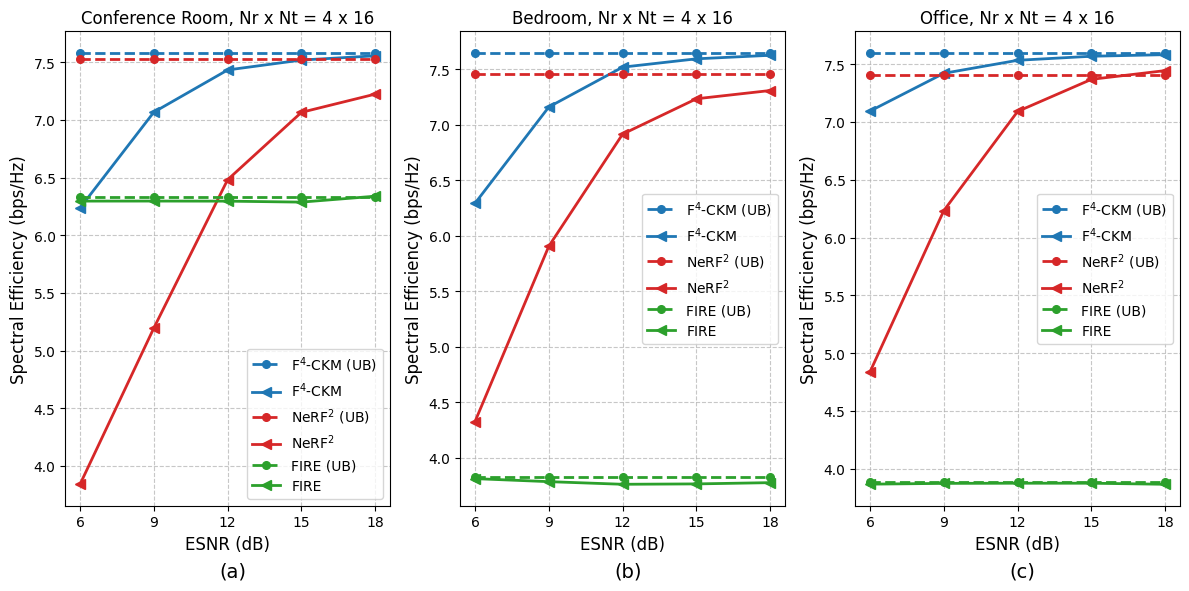

In [49]:

import matplotlib.pyplot as plt
from visualizer import LineStyle, StyleManager

# 选择要画的场景索引，例如 [0, 2] 只画 Conference 和 Office
scenes_to_plot = [0, 1, 2]  # 可改为任意组合，如 [1], [0,2] 等

# 每个场景的数据和标题
scene_data = [
    {
        'title': 'Conference Room, Nr x Nt = 4 x 16',
        'rates': [
            rate_ub_f4ckm_conference, rate_mean_f4ckm_conference,
            rate_ub_nerf2_conference, rate_mean_nerf2_conference,
            rate_ub_fire_conference, rate_mean_fire_conference
        ]
    },
    {
        'title': 'Bedroom, Nr x Nt = 4 x 16',
        'rates': [
            rate_ub_f4ckm_bedroom, rate_mean_f4ckm_bedroom,
            rate_ub_nerf2_bedroom, rate_mean_nerf2_bedroom,
            rate_ub_fire_bedroom, rate_mean_fire_bedroom
        ]
    },
    {
        'title': 'Office, Nr x Nt = 4 x 16',
        'rates': [
            rate_ub_f4ckm_office, rate_mean_f4ckm_office,
            rate_ub_nerf2_office, rate_mean_nerf2_office,
            rate_ub_fire_office, rate_mean_fire_office
        ]
    }
]

label_tab = [
    'F$^4$-CKM (UB)',
    'F$^4$-CKM',
    'NeRF$^2$ (UB)',
    'NeRF$^2$',
    'FIRE (UB)',
    'FIRE',
]

n_subplots = len(scenes_to_plot)
fig, axs = plt.subplots(1, n_subplots, figsize=(4 * n_subplots, 6))
if n_subplots == 1:
    axs = [axs]

for idx, scene_idx in enumerate(scenes_to_plot):
    scene = scene_data[scene_idx]
    for i, data in enumerate(scene['rates']):
        style = StyleManager.get_style(i, repeat=[1, 1, 2], cycle=[2, 2, 3])
        linestyle = LineStyle.get_style((i + 1) % 2)
        axs[idx].plot(
            esnr_tab[2:], data[2:],
            linestyle=linestyle,
            marker=style['marker'],
            markersize=5.5 * style['markersize'],
            color=style['color'],
            linewidth=2,
            label=label_tab[i]
        )
    axs[idx].set_xlabel('ESNR (dB)', fontsize=12)
    axs[idx].set_xticks(range(6, 19, 3))
    axs[idx].set_ylabel('Spectral Efficiency (bps/Hz)', fontsize=12)
    axs[idx].set_title(scene['title'], fontsize=12)
    axs[idx].grid(linestyle='--', alpha=0.7)
    axs[idx].legend(loc='best', fontsize=10, ncol=1)
    axs[idx].text(0.475, -0.15, f'({chr(ord("a")+idx)})', transform=axs[idx].transAxes, fontsize=14)

plt.tight_layout()
# plt.savefig('./Figures/sim_esnr.pdf', format='pdf')
plt.show()

## 7. Prediction Example

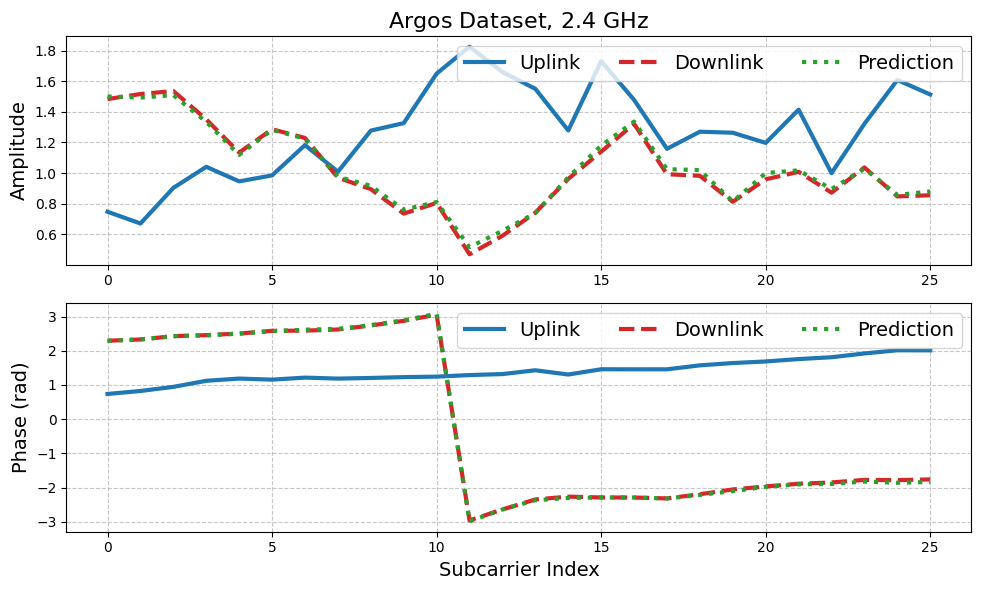

In [36]:
import matplotlib.patches as mpatches
from visualizer import StyleManager



sc_idx = np.arange(26)

fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs = axs.flatten()

label_tab = [
    'Uplink',
    'Downlink',
    'Prediction',
]

# amplitude
for i, data in enumerate([amp_input_argos, amp_label_argos, amp_pred_argos]):
    style = StyleManager.get_style(i)
    axs[0].plot(sc_idx, data, linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=3, label=label_tab[i])
# axs[0].set_xlabel('Subcarrier Index', fontsize=14)
axs[0].set_ylabel('Amplitude', fontsize=14)
axs[0].set_title('Argos Dataset, $2.4$ GHz', fontsize=16)
axs[0].grid(linestyle='--', alpha=0.7)
axs[0].legend(loc=1, fontsize=14, ncol=3)

# phase
for i, data in enumerate([phase_input_argos, phase_label_argos, phase_pred_argos]):
    style = StyleManager.get_style(i)
    axs[1].plot(sc_idx, data, linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=3, label=label_tab[i])
axs[1].set_xlabel('Subcarrier Index', fontsize=14)
axs[1].set_ylabel('Phase (rad)', fontsize=14)
# axs[1].set_title('Argos Dataset, $2.4$ GHz', fontsize=16)
axs[1].grid(linestyle='--', alpha=0.7)
axs[1].legend(loc=1, fontsize=14, ncol=3)

# labels = ['(a)', '(b)']
# for i in range(1):
#     label = labels[i] 
#     axs[i].text(0.475, -0.15, label, transform=axs[i].transAxes, fontsize=12)
#     label = labels[1 + i] 
#     axs[1 + i].text(0.475, -0.25, label, transform=axs[1 + i].transAxes, fontsize=12)
    
# 调整布局并显示
plt.tight_layout()
# plt.savefig('./Figures/sim_example.pdf', format='pdf')
plt.show()

## 8. Ablation Study

### 8.1 system level performance

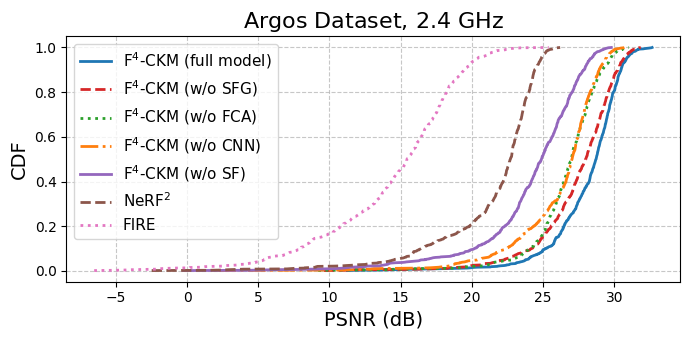

In [25]:
import matplotlib.patches as mpatches
from visualizer import StyleManager

# F4CKM full model
snr_argos_full = cal_cdf(snr_list_argos_full)
sgcs_argos_full = cal_cdf(sgcs_list_argos_full)
# F4CKM w/o FCA modules
snr_argos_wofca = cal_cdf(snr_list_argos_wofca)
sgcs_argos_wofca = cal_cdf(sgcs_list_argos_wofca)
# F4CKM w/o CNN backbone
snr_argos_wocnn = cal_cdf(snr_list_argos_wocnn)
sgcs_argos_wocnn = cal_cdf(sgcs_list_argos_wocnn)
# F4CKM w/o SFG sampling
snr_argos_wosfg = cal_cdf(snr_list_argos_wosfg)
sgcs_argos_wosfg = cal_cdf(sgcs_list_argos_wosfg)
# F4CKM w/o shaping filter
snr_argos_wosf = cal_cdf(snr_list_argos_wosf)
sgcs_argos_wosf = cal_cdf(sgcs_list_argos_wosf)
# NeRF2
snr_argos_nerf2 = cal_cdf(snr_list_argos_nerf2)
sgcs_argos_nerf2 = cal_cdf(sgcs_list_argos_nerf2)
# FIRE
snr_argos_fire = cal_cdf(snr_list_argos_fire)
sgcs_argos_fire = cal_cdf(sgcs_list_argos_fire)

fig, axs = plt.subplots(1, 1, figsize=(7, 3.5))

label_tab = [
    'F$^4$-CKM (full model)',
    'F$^4$-CKM (w/o SFG)',
    'F$^4$-CKM (w/o FCA)',
    'F$^4$-CKM (w/o CNN)',
    'F$^4$-CKM (w/o SF)',
    'NeRF$^2$',
    'FIRE'
]

# Argos
for i, data in enumerate([snr_argos_full,
                          snr_argos_wosfg,
                          snr_argos_wofca,
                          snr_argos_wocnn,
                          snr_argos_wosf,
                          snr_argos_nerf2,
                          snr_argos_fire]):
    style = StyleManager.get_style(i, repeat=[1, 1, 1], cycle=[10, 10, 10])
    axs.plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=2, label=label_tab[i])
axs.set_xlabel('PSNR (dB)', fontsize=14)
axs.set_ylabel('CDF', fontsize=14)
axs.set_title('Argos Dataset, $2.4$ GHz', fontsize=16)
axs.grid(linestyle='--', alpha=0.7)
axs.legend(loc=2, fontsize=11)
        
plt.tight_layout()
# plt.savefig('./Figures/sim_ablation.pdf', format='pdf')
plt.show()

### 8.2 fast learning

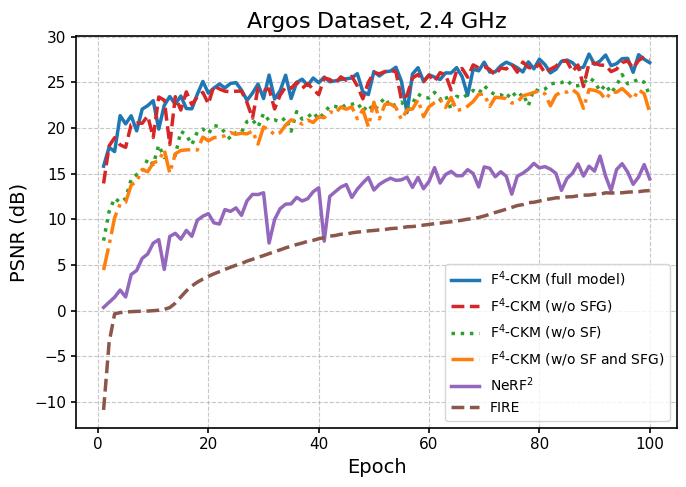

In [43]:
from visualizer import StyleManager

epoch = np.arange(100)

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

label_tab = [
    'F$^4$-CKM (full model)',
    'F$^4$-CKM (w/o SFG)',
    'F$^4$-CKM (w/o SF)',
    'F$^4$-CKM (w/o SF and SFG)',
    'NeRF$^2$',
    'FIRE'
]

# argos
for i, data in enumerate([val_wsf_wsfg_argos[:100, 1],
                          val_wsf_wosfg_argos[:100, 1],
                          val_wosf_wsfg_argos[:100, 1],
                          val_wosf_wosfg_argos[:100, 1],
                          val_nerf2_argos[:100, 1],
                          val_fire_argos[:100, 1]
                          ]):
    style = StyleManager.get_style(i)
    axs.plot(epoch+1, data, linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=2.5, label=label_tab[i])
axs.set_xlabel('Epoch', fontsize=14)
axs.set_ylabel('PSNR (dB)', fontsize=14)
axs.set_title('Argos Dataset, $2.4$ GHz', fontsize=16)
axs.grid(linestyle='--', alpha=0.7)
axs.legend(loc=4, fontsize=10, ncol=1)

# labels = ['(a)', '(b)']
# for i in range(1):
#     label = labels[i] 
#     axs[i].text(0.475, -0.25, label, transform=axs[i].transAxes, fontsize=14)
#     label = labels[1 + i] 
#     axs[1 + i].text(0.475, -0.25, label, transform=axs[1 + i].transAxes, fontsize=14)
    
# 调整布局并显示
plt.tight_layout()
# plt.savefig('./Figures/sim_fastlearning.pdf', format='pdf')
plt.show()

# Evaluation Cell
This cell is no longer in maintenance.
It is recommended to produce the results using `performance.py`

## 1. Preliminaries

In [ ]:
from argparse import ArgumentParser
from eval import cal_cdf, evaluation, parse_log_file
import os
import numpy as np
from omegaconf import OmegaConf
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import DatasetLoader
from train import preliminary
from utils import init_models

parser = ArgumentParser()
parser.add_argument('--env', type=str, choices=['conferenceroom', 'bedroom', 'office'], default='argos')
parser.add_argument('--ckpt', type=str, default='best_epoch')
parser.add_argument('--lr', type=float, default=1e-4)
parser.add_argument('--d_input', nargs='*', type=int, default=[26, 1, 8])
parser.add_argument('--seed', type=int, default=0)
parser.add_argument('--batchsize', type=int, default=1)
parser.add_argument('--epochs', type=int, default=200)
parser.add_argument('--filter', type=str, default='sd')
parser.add_argument('--mode', type=str, default='fb')
parser.add_argument('--define', type=str, default='nerf')
parser.add_argument('-an', '--aoa_noise', type=int, default=0)
parser.add_argument('-wd', '--weight_decay', type=float, default=0.0001)
parser.add_argument('-mt', '--model_tag', type=str, default='2.4GHz_SF_FB_Argos')
parser.add_argument('-dt', '--data_tag', type=str, default='argos')
parser.add_argument('--device', type=int, default=1)
parser.add_argument('-r', '--retrain', action='store_true', default=False)

args = parser.parse_args()
cfg = OmegaConf.load('./config/default.yaml')
cfg.sampling.doa_noise = args.aoa_noise
test_tag = f'EG'
data_dir = "./simulator/datasets/"

(_, loader_test, file_logger, disp_logger, device) = preliminary(args, cfg, data_dir, test=True, test_tag=test_tag)


****************************** Logger ******************************
==> Logger saved at: ./logger/bedroom/3.5GHz_MIMO_FB_sd_2025-04-07_15-08-06_test_AC.log

****************************** Key Configurations ******************************
model tag: 3.5GHz_MIMO_FB
filter: sd
data tag: 3.5GHz_random
lr: 0.0001
min_lr: 5e-06
weight_decay: 0.0001

n_samples: 128
known_aoa: False
fibonacci: True
n_rays: 24
DoA noise: 5

****************************** Hardware ******************************
==> Using cuda:0

****************************** RNG ******************************
==> Using seed:0

****************************** Dataloader ******************************
==> training dataset: ./simulator/datasets/bedroom_3.5GHz_random20000.pkl
==> testing dataset: ./simulator/datasets/bedroom_3.5GHz_random4000.pkl


## 2. Evaluate SNR (NMSE) & SGCS Performance

In [2]:
mode = 'an'
an_tab = [0, 1, 5, 10, 20]
ac_tab = [2, 6, 10, 14, 18, 'inf']

# conference model
if args.env == 'conferenceroom':
    tag_conference = '3.5GHz_MIMO'
    ckpt_conference = f'ckpt/conferenceroom/{args.model_tag}_{args.filter}_ckpt_best.pt'
    (model, encode, encode_viewdirs, optimizer, scheduler, synthesizer, history_epoch, best_score) = init_models(args, cfg, device, disp_logger, ckpt_conference)
    (snr_list_conference, sgcs_list_conference) = evaluation(args, cfg, model, loader_test, encode, encode_viewdirs, optimizer, synthesizer, device, mode=mode, an_tab=an_tab)
    pfm_conference = {
        'snr_list': snr_list_conference.cpu().numpy(),
        'sgcs_list': sgcs_list_conference.cpu().numpy(),
    }
    savedir_conference = f'./performance/conferenceroom/{args.model_tag}_{args.filter}_{test_tag}.npy'
    np.save(savedir_conference, pfm_conference)
    disp_logger.info(f'==> Simulation results saved to: {savedir_conference}')
# bedroom model
elif args.env == 'bedroom':
    tag_bedroom = '3.5GHz_MIMO'
    ckpt_bedroom = f'ckpt/bedroom/{args.model_tag}_{args.filter}_ckpt_best.pt'
    (model, encode, encode_viewdirs, optimizer, scheduler, synthesizer, history_epoch, best_score) = init_models(args, cfg, device, disp_logger, ckpt_bedroom)
    (snr_list_bedroom, sgcs_list_bedroom) = evaluation(args, cfg, model, loader_test, encode, encode_viewdirs, optimizer, synthesizer, device, mode=mode, an_tab=an_tab)
    pfm_bedroom = {
        'snr_list': snr_list_bedroom.cpu().numpy(),
        'sgcs_list': sgcs_list_bedroom.cpu().numpy()
    }
    savedir_bedroom = f'./performance/bedroom/{args.model_tag}_{args.filter}_{test_tag}.npy'
    np.save(savedir_bedroom, pfm_bedroom)
    disp_logger.info(f'==> Simulation results saved to: {savedir_bedroom}')
# office model
elif args.env =='office':
    tag_office = '3.5GHz_MIMO'
    ckpt_office = f'ckpt/office/{args.model_tag}_{args.filter}_ckpt_best.pt'
    (model, encode, encode_viewdirs, optimizer, scheduler, synthesizer, history_epoch, best_score) = init_models(args, cfg, device, disp_logger, ckpt_office)
    (snr_list_office, sgcs_list_office) = evaluation(args, cfg, model, loader_test, encode, encode_viewdirs, optimizer, synthesizer, device, mode=mode, an_tab=an_tab)
    pfm_office = {
        'snr_list': snr_list_office.cpu().numpy(),
        'sgcs_list': sgcs_list_office.cpu().numpy()
    }
    savedir_office = f'./performance/office/{args.model_tag}_{args.filter}_{test_tag}.npy'
    np.save(savedir_office, pfm_office)
    disp_logger.info(f'==> Simulation results saved to: {savedir_office}')


****************************** Model ******************************
==> Loading models from checkpoint: ckpt/bedroom/3.5GHz_MIMO_FB_sd_ckpt_best.pt
==> Total Parameters: 3.62 M
==> Trainable Parameters: 3.62 M


100%|██████████| 8920/8920 [39:20<00:00,  3.78iter/s, aoa_noise=20°, snr_mean=10.2385 dB, snr_mid=10.5321 dB, sgcs_mid=0.9688]

==> Simulation results saved to: ./performance/bedroom/3.5GHz_MIMO_FB_sd_AN.npy


# Round 2 Response

### 2.2.1 CNN ablation

In [19]:

datatype = 'sys'

"""conferenceroom dataset"""
# F4CKM full model
path_conf_full = f'./performance/conferenceroom/2.4GHz_SF_FB_sd.npy'
snr_list_conference_full, sgcs_list_conference_full = load_performance(path_conf_full, datatype)
# F4CKM w/o CNN backbone
path_conf_wocnn = f'./performance/conferenceroom/2.4GHz_SF_FB_sd_wocnn.npy'
snr_list_conference_wocnn, sgcs_list_conference_wocnn = load_performance(path_conf_wocnn, datatype)
"""argos dataset"""
# F4CKM full model
path_argos_full = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wonsfg.npy'
snr_list_argos_full, sgcs_list_argos_full = load_performance(path_argos_full, datatype)
# F4CKM w/o CNN backbone
path_argos_wocnn = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wocnn.npy'
snr_list_argos_wocnn, sgcs_list_argos_wocnn = load_performance(path_argos_wocnn, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd_wocnn.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wonsfg.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wocnn.npy


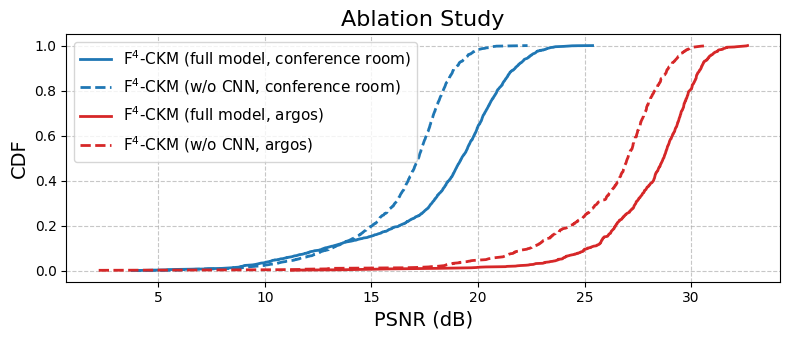

In [27]:
import matplotlib.patches as mpatches
from visualizer import StyleManager

"""conference room dataset"""
# F4CKM full model
snr_conf_full = cal_cdf(snr_list_conference_full)
sgcs_conf_full = cal_cdf(sgcs_list_conference_full)
# F4CKM w/o CNN backbone
snr_conf_wocnn = cal_cdf(snr_list_conference_wocnn)
sgcs_conf_wocnn = cal_cdf(sgcs_list_conference_wocnn)
"""argos dataset"""
# F4CKM full model
snr_argos_full = cal_cdf(snr_list_argos_full)
sgcs_argos_full = cal_cdf(sgcs_list_argos_full)
# F4CKM w/o CNN backbone
snr_argos_wocnn = cal_cdf(snr_list_argos_wocnn)
sgcs_argos_wocnn = cal_cdf(sgcs_list_argos_wocnn)

fig, axs = plt.subplots(1, 1, figsize=(8, 3.5))

label_tab = [
    'F$^4$-CKM (full model, conference room)',
    'F$^4$-CKM (w/o CNN, conference room)',
    'F$^4$-CKM (full model, argos)',
    'F$^4$-CKM (w/o CNN, argos)',
]

# Argos
for i, data in enumerate([snr_conf_full,
                          snr_conf_wocnn,
                          snr_argos_full,
                          snr_argos_wocnn
                          ]):
    style = StyleManager.get_style(i, repeat=[1, 1, 2], cycle=[2, 10, 10])
    axs.plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=2, label=label_tab[i])
axs.set_xlabel('PSNR (dB)', fontsize=14)
axs.set_ylabel('CDF', fontsize=14)
axs.set_title('Ablation Study', fontsize=16)
axs.grid(linestyle='--', alpha=0.7)
axs.legend(loc=2, fontsize=11)
        
plt.tight_layout()
# plt.savefig('./Figures/sim_ablation_cnn.pdf', format='pdf')
plt.show()

### 2.2.2 NeWRF Comparison

In [3]:
from eval import load_performance

model_tag = '2.4GHz_SF_FB'
datatype = 'filter'

"""conferenceroom"""
# NeWRF
path_newrf_conf = f'./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_newrf.npy'
train_newrf_conf, val_newrf_conf = load_performance(path_newrf_conf, datatype)
# NeRF2
path_nerf2_conf = f'./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_nerf2.npy'
train_nerf2_conf, val_nerf2_conf = load_performance(path_nerf2_conf, datatype)
# FIRE
path_fire_conf = f'./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_fire.npy'
train_fire_conf, val_fire_conf = load_performance(path_fire_conf, datatype)
# F4CKM
path_sd_conf = f'./performance/conferenceroom/shapingfilter_{model_tag}_sd.npy'
train_sd_conf, val_sd_conf = load_performance(path_sd_conf, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_newrf.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_nerf2.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_MIMO_fire.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/shapingfilter_2.4GHz_SF_FB_sd.npy


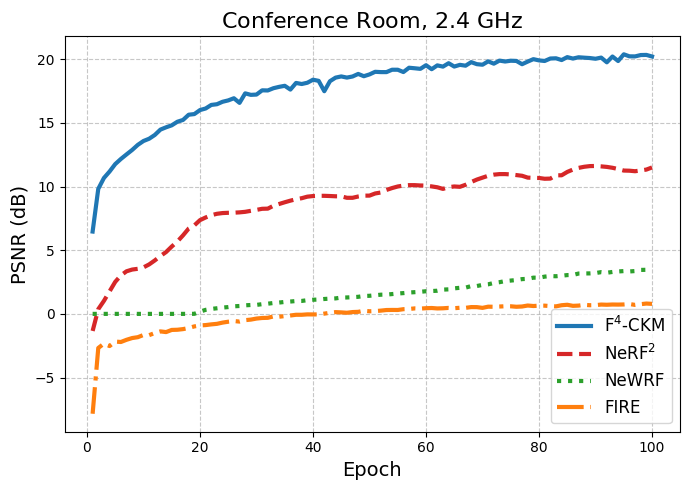

In [26]:
from visualizer import StyleManager

epoch = np.arange(100) + 1

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

label_tab = [
    'F$^4$-CKM',
    'NeRF$^2$',
    'NeWRF',
    'FIRE'
]

# conferenceroom
for i, data in enumerate([
                        train_sd_conf[:100, 1],
                        train_nerf2_conf[:100, 1],
                        train_newrf_conf[:100, 1],
                        train_fire_conf[:100, 1]
                        ]):
    style = StyleManager.get_style(i)
    axs.plot(epoch, data, linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=3, label=label_tab[i])
axs.set_xlabel('Epoch', fontsize=14)
axs.set_ylabel('PSNR (dB)', fontsize=14)
axs.set_title('Conference Room, $2.4$ GHz', fontsize=16)
axs.grid(linestyle='--', alpha=0.7)
axs.legend(loc=4, fontsize=12, ncol=1)
    
plt.tight_layout()
# plt.savefig('./Figures/sim_newrf_comparison.pdf', format='pdf')
plt.show()

### 2.3.1 FCA ablation

In [53]:

datatype = 'sys'

"""conferenceroom dataset"""
# F4CKM full model
path_conf_full = f'./performance/conferenceroom/2.4GHz_SF_FB_sd.npy'
snr_list_conference_full, sgcs_list_conference_full = load_performance(path_conf_full, datatype)
# F4CKM w/o FCA
path_conf_wofca = f'./performance/conferenceroom/2.4GHz_SF_FB_sd_wofca.npy'
snr_list_conference_wofca, sgcs_list_conference_wofca = load_performance(path_conf_wofca, datatype)
"""argos dataset"""
# F4CKM full model
path_argos_full = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wonsfg.npy'
snr_list_argos_full, sgcs_list_argos_full = load_performance(path_argos_full, datatype)
# F4CKM w/o FCA
path_argos_wofca = f'./performance/argos/2.4GHz_SF_FB_Argos_sd_wofca.npy'
snr_list_argos_wofca, sgcs_list_argos_wofca = load_performance(path_argos_wofca, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd_wofca.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wonsfg.npy
==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_sd_wofca.npy


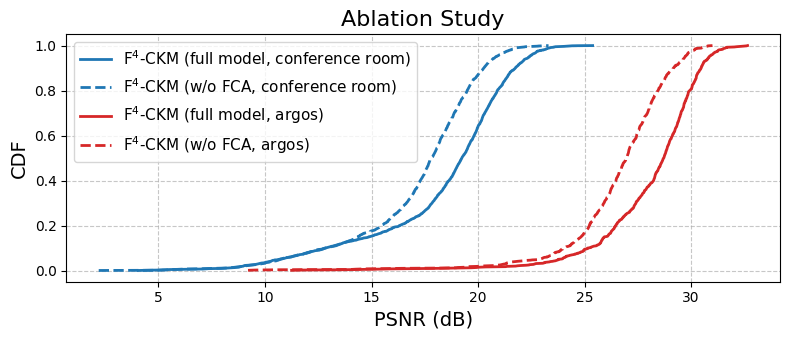

In [58]:
import matplotlib.patches as mpatches
from visualizer import StyleManager

"""conference room dataset"""
# F4CKM full model
snr_conf_full = cal_cdf(snr_list_conference_full)
sgcs_conf_full = cal_cdf(sgcs_list_conference_full)
# F4CKM w/o CNN backbone
snr_conf_wofca = cal_cdf(snr_list_conference_wofca)
sgcs_conf_wofca = cal_cdf(sgcs_list_conference_wofca)
"""argos dataset"""
# F4CKM full model
snr_argos_full = cal_cdf(snr_list_argos_full)
sgcs_argos_full = cal_cdf(sgcs_list_argos_full)
# F4CKM w/o CNN backbone
snr_argos_wofca = cal_cdf(snr_list_argos_wofca)
sgcs_argos_wofca = cal_cdf(sgcs_list_argos_wofca)

fig, axs = plt.subplots(1, 1, figsize=(8, 3.5))

label_tab = [
    'F$^4$-CKM (full model, conference room)',
    'F$^4$-CKM (w/o FCA, conference room)',
    'F$^4$-CKM (full model, argos)',
    'F$^4$-CKM (w/o FCA, argos)',
]

# Argos
for i, data in enumerate([snr_conf_full,
                          snr_conf_wofca,
                          snr_argos_full,
                          snr_argos_wofca
                          ]):
    style = StyleManager.get_style(i, repeat=[1, 1, 2], cycle=[2, 10, 10])
    axs.plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=2, label=label_tab[i])
axs.set_xlabel('PSNR (dB)', fontsize=14)
axs.set_ylabel('CDF', fontsize=14)
axs.set_title('Ablation Study', fontsize=16)
axs.grid(linestyle='--', alpha=0.7)
axs.legend(loc=2, fontsize=11)
        
plt.tight_layout()
# plt.savefig('./Figures/sim_ablation_fca.pdf', format='pdf')
plt.show()

### 2.3.2 28.0GHz experiment

In [30]:
from eval import *

filter = 'sd'
datatype = 'sys'

# F4CKM 28GHz model
path_28 = f'./performance/conferenceroom/28GHz_SF_FB_sd.npy'
snr_list_28_f4ckm, sgcs_list_28_f4ckm = load_performance(path_28, datatype)
# NeWRF 28GHz model
path_28 = f'./performance/NeWRF/28GHz_MIMO_NeWRF_conferenceroom.npy'
snr_list_28_newrf, sgcs_list_28_newrf = load_performance(path_28, datatype)
# NeRF2 28GHz model
path_28 = f'./performance/NeRF2/28.0GHz_MIMO_NeRF2_conferenceroom.npy'
snr_list_28_nerf2, sgcs_list_28_nerf2 = load_performance(path_28, datatype)
# FIRE 28GHz model
path_28 = f'./performance/FIRE/28.0GHz_MIMO_FIRE_conferenceroom.npy'
snr_list_28_fire, sgcs_list_28_fire = load_performance(path_28, datatype)

==> Simulation results loaded successfully from: ./performance/conferenceroom/28GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/28GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/28.0GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/FIRE/28.0GHz_MIMO_FIRE_conferenceroom.npy


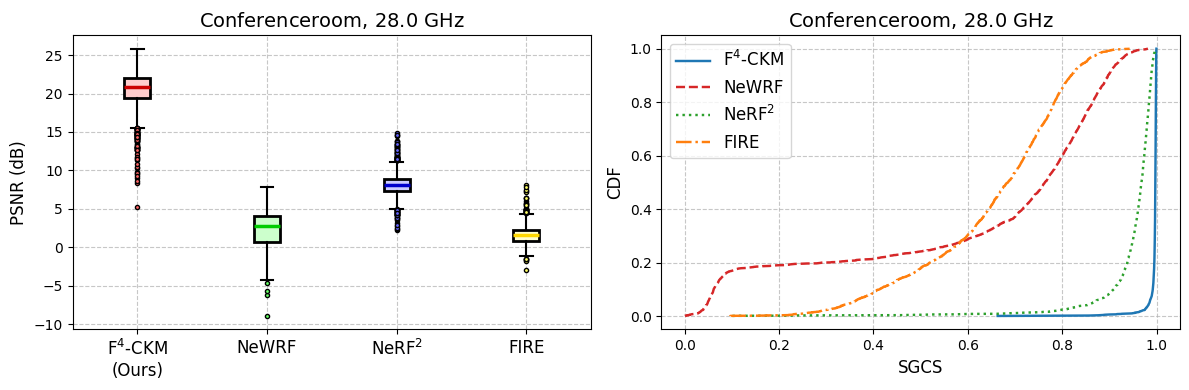

In [35]:
import matplotlib.patches as mpatches
from visualizer import StyleManager

# F4CKM 28GHz model
snr_28_f4ckm = cal_cdf(snr_list_28_f4ckm)
sgcs_28_f4ckm = cal_cdf(sgcs_list_28_f4ckm)
# NeWRF 28GHz model
snr_28_newrf = cal_cdf(snr_list_28_newrf)
sgcs_28_newrf = cal_cdf(sgcs_list_28_newrf)
# NeRF2 28GHz model
snr_28_nerf2 = cal_cdf(snr_list_28_nerf2)
sgcs_28_nerf2 = cal_cdf(sgcs_list_28_nerf2)
# FIRE 28GHz model
snr_28_fire = cal_cdf(snr_list_28_fire)
sgcs_28_fire = cal_cdf(sgcs_list_28_fire)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()  # 将二维数组展平为一维，方便索引

# box-plot styles
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC']  # 浅红、浅绿、浅蓝、浅黄
outlier_colors = ['#FF6666', '#66FF66', '#6666FF', '#FFFF66']  # 离群点颜色
median_colors = ['#CC0000', '#00CC00', '#0000CC', '#FFD800']  # 中位线颜色
legend_patches = [
    mpatches.Patch(color='#FFCCCC', label='F$^4$-CKM (Ours)'),
    mpatches.Patch(color='#CCFFCC', label='NeWRF'),
    mpatches.Patch(color='#CCCCFF', label='NeRF$^2$'),
    mpatches.Patch(color='#FFFFCC', label='FIRE'),]  # 创建图例
boxprops = dict(linestyle='-', linewidth=2, edgecolor='black')  # 箱体边框样式
medianprops = dict(linestyle='-', linewidth=2.5, color='black')  # 中位数线样式
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')  # 须线样式
capprops = dict(linestyle='-', linewidth=1.5, color='black')  # 须线端点样式
flierprops = dict(marker='o', markerfacecolor='r', markersize=3, linestyle='none')  # 离群点样式
widths = 0.2  # 箱体宽度
label_tab = [
    'F$^4$-CKM\n(Ours)',
    'NeWRF',
    'NeRF$^2$',
    'FIRE',
]

# 28 GHz
bp4 = axs[0].boxplot([snr_list_28_f4ckm,
                      snr_list_28_newrf,
                      snr_list_28_nerf2,
                      snr_list_28_fire], tick_labels=label_tab, boxprops=boxprops, widths=widths,
                     medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# set box and point color
for patch, color, outlier_color in zip(bp4['boxes'], colors, outlier_colors):
    patch.set_facecolor(color)
for flier, outlier_color in zip(bp4['fliers'], outlier_colors):
    flier.set_markerfacecolor(outlier_color)
for median, median_color in zip(bp4['medians'], median_colors):
    median.set_color(median_color)
axs[0].set_title('Conferenceroom, $28.0$ GHz', fontsize=14)
axs[0].set_ylabel('PSNR (dB)', fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].grid(linestyle='--', alpha=0.7)
# axs[2].legend(handles=legend_patches, loc=3, fontsize=12)

label_tab = [
    'F$^4$-CKM',
    'NeWRF',
    'NeRF$^2$',
    'FIRE',
]

# 28 GHz
for i, data in enumerate([sgcs_28_f4ckm, sgcs_28_newrf, sgcs_28_nerf2, sgcs_28_fire]):
    style = StyleManager.get_style(i)
    axs[1].plot(data[0], data[1], linestyle=style['linestyle'], marker=None, color=style['color'], linewidth=style['linewidth'], label=label_tab[i])
axs[1].set_xlabel('SGCS', fontsize=12)
axs[1].set_ylabel('CDF', fontsize=12)
axs[1].set_title('Conferenceroom, $28.0$ GHz', fontsize=14)
axs[1].grid(linestyle='--', alpha=0.7)
axs[1].legend(loc=2, fontsize=12)

plt.tight_layout()
# plt.savefig('./Figures/sim_28GHz.pdf', format='pdf')
plt.show()

### 2.4.1 sampling resolution: 100 epochs for each configuration

In [4]:

radial_range_tab = ['3.0', '5.0', '7.0', '9.0']
n_rays_tab = ['16', '24', '32', '40']
n_samples_tab = ['16', '32', '64', '128']

path = './performance/argos/2.4GHz_SF_FB_Argos_lite_sd_SS.npy'
pfm_list = load_performance(path, 'psnr')  # shape: (64,) of arrays
pfm_mean = np.array([np.mean(group) for group in pfm_list])  # shape: (64,)

L1, L2, L3 = len(radial_range_tab), len(n_rays_tab), len(n_samples_tab)
pfm_full_3d = np.stack(pfm_list, axis=0)  # (64, N_test)
pfm_full_3d = pfm_full_3d.reshape(L1, L2, L3, -1)     # (4, 4, 4, N_test)
pfm_mean_3d = pfm_mean.reshape(L1, L2, L3)  # (4, 4, 4)
print(pfm_mean_3d.min(), pfm_mean_3d.max())

==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_lite_sd_SS.npy
27.140078 28.88218


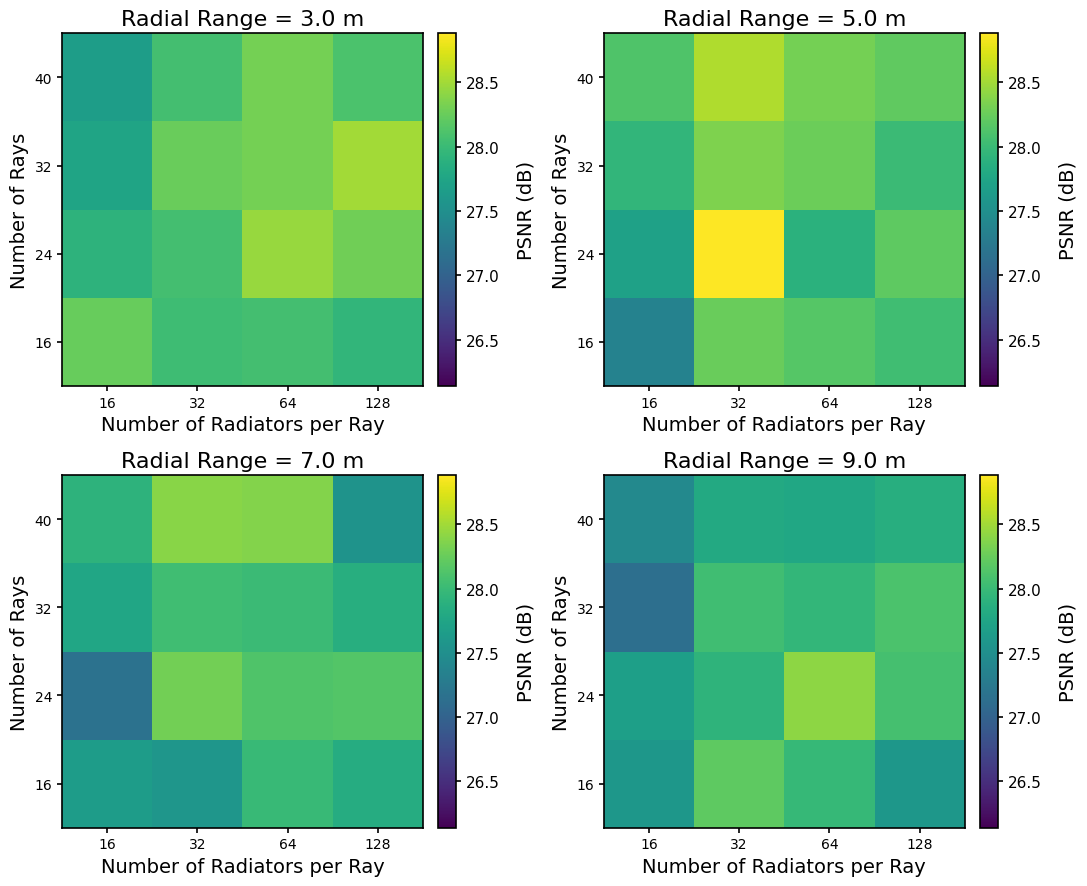

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({
    'font.size': 11, 'axes.linewidth': 1.2,
    'xtick.major.width': 1.2, 'ytick.major.width': 1.2,
    'axes.labelsize': 12, 'axes.titlesize': 14
})

vmin, vmax = pfm_mean_3d.min() - 1, pfm_mean_3d.max()
fig, axes = plt.subplots(2, 2, figsize=(11, 9))
highlight_color = 'red'
highlight_lw = 2.5

for idx, (r, ax) in enumerate(zip(radial_range_tab, axes.flat)):
    data = pfm_mean_3d[idx, :, :]
    im = ax.imshow(data, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
    ax.set_xticks(range(len(n_samples_tab)))
    ax.set_xticklabels(n_samples_tab, fontsize=10)
    ax.set_yticks(range(len(n_rays_tab)))
    ax.set_yticklabels(n_rays_tab, fontsize=10)
    ax.set_xlabel('Number of Radiators per Ray', fontsize=14)
    ax.set_ylabel('Number of Rays', fontsize=14)
    ax.set_title(f'Radial Range = {r} m', fontsize=16)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = plt.colorbar(im, cax=cax, shrink=0.95)
    cbar.set_label('PSNR (dB)', rotation=90, labelpad=12, fontsize=14)

plt.tight_layout()
# plt.savefig('./Figures/sim_sampling_res.pdf', format='pdf')
plt.show()

In [96]:
import numpy as np

# 假设以下变量已定义（你已提供）
radial_range_tab = ['3.0', '5.0', '7.0', '9.0']
n_rays_tab = ['16', '24', '32', '40']
n_samples_tab = ['16', '32', '64', '128']

# pfm_mean_3d: shape (4, 4, 4) → [radial_idx, ray_idx, sample_idx]
# 示例：pfm_mean_3d[i, j, k] = PSNR for radial_range_tab[i], n_rays_tab[j], n_samples_tab[k]

# ---------- 1. Per-radial-range analysis ----------
print("=== Per Radial Range Analysis ===")
opt_ray_per_range = []
opt_sample_per_range = []

for i, r in enumerate(radial_range_tab):
    # Fix radial range i, average over n_samples → get (4,) for n_rays
    mean_over_samples = pfm_mean_3d[i, :, :].mean(axis=1)  # (4,)
    best_ray_idx = np.argmax(mean_over_samples)
    best_ray = n_rays_tab[best_ray_idx]
    best_ray_val = mean_over_samples[best_ray_idx]
    
    # Fix radial range i, average over n_rays → get (4,) for n_samples
    mean_over_rays = pfm_mean_3d[i, :, :].mean(axis=0)  # (4,)
    best_sample_idx = np.argmax(mean_over_rays)
    best_sample = n_samples_tab[best_sample_idx]
    best_sample_val = mean_over_rays[best_sample_idx]
    
    opt_ray_per_range.append((r, best_ray, best_ray_val))
    opt_sample_per_range.append((r, best_sample, best_sample_val))
    
    print(f"Radial range {r} m:")
    print(f"  → Optimal n_rays (avg over samples): {best_ray} (PSNR = {best_ray_val:.2f} dB)")
    print(f"  → Optimal n_samples (avg over rays): {best_sample} (PSNR = {best_sample_val:.2f} dB)")

# ---------- 2. Global analysis ----------
print("\n=== Global Analysis (averaged over other dims) ===")

# Global optimal n_rays: avg over radial_range & n_samples → shape (4,)
global_mean_rays = pfm_mean_3d.mean(axis=(0, 2))  # (4,)
best_global_ray_idx = np.argmax(global_mean_rays)
best_global_ray = n_rays_tab[best_global_ray_idx]
print(f"Global optimal n_rays (avg over range & samples): {best_global_ray} "
      f"(PSNR = {global_mean_rays[best_global_ray_idx]:.2f} dB)")

# Global optimal n_samples: avg over radial_range & n_rays → shape (4,)
global_mean_samples = pfm_mean_3d.mean(axis=(0, 1))  # (4,)
best_global_sample_idx = np.argmax(global_mean_samples)
best_global_sample = n_samples_tab[best_global_sample_idx]
print(f"Global optimal n_samples (avg over range & rays): {best_global_sample} "
      f"(PSNR = {global_mean_samples[best_global_sample_idx]:.2f} dB)")

# Global optimal radial_range: avg over n_rays & n_samples → shape (4,)
global_mean_range = pfm_mean_3d.mean(axis=(1, 2))  # (4,)
best_global_range_idx = np.argmax(global_mean_range)
best_global_range = radial_range_tab[best_global_range_idx]
print(f"Global optimal radial_range (avg over rays & samples): {best_global_range} m "
      f"(PSNR = {global_mean_range[best_global_range_idx]:.2f} dB)")

# ---------- 3. Optional: Show full per-range best config (not averaged) ----------
print("\n=== Best Overall Config per Radial Range (no averaging) ===")
for i, r in enumerate(radial_range_tab):
    # Find global max in slice [i, :, :]
    slice_2d = pfm_mean_3d[i, :, :]  # (4, 4)
    j_opt, k_opt = np.unravel_index(np.argmax(slice_2d), slice_2d.shape)
    best_ray = n_rays_tab[j_opt]
    best_sample = n_samples_tab[k_opt]
    best_psnr = slice_2d[j_opt, k_opt]
    print(f"Radial range {r} m: best config = {best_ray} rays × {best_sample} samples → PSNR = {best_psnr:.2f} dB")

=== Per Radial Range Analysis ===
Radial range 3.0 m:
  → Optimal n_rays (avg over samples): 32 (PSNR = 28.20 dB)
  → Optimal n_samples (avg over rays): 64 (PSNR = 28.28 dB)
Radial range 5.0 m:
  → Optimal n_rays (avg over samples): 40 (PSNR = 28.30 dB)
  → Optimal n_samples (avg over rays): 32 (PSNR = 28.51 dB)
Radial range 7.0 m:
  → Optimal n_rays (avg over samples): 40 (PSNR = 28.06 dB)
  → Optimal n_samples (avg over rays): 64 (PSNR = 28.13 dB)
Radial range 9.0 m:
  → Optimal n_rays (avg over samples): 24 (PSNR = 28.03 dB)
  → Optimal n_samples (avg over rays): 64 (PSNR = 28.03 dB)

=== Global Analysis (averaged over other dims) ===
Global optimal n_rays (avg over range & samples): 24 (PSNR = 28.08 dB)
Global optimal n_samples (avg over range & rays): 32 (PSNR = 28.17 dB)
Global optimal radial_range (avg over rays & samples): 5.0 m (PSNR = 28.14 dB)

=== Best Overall Config per Radial Range (no averaging) ===
Radial range 3.0 m: best config = 32 rays × 128 samples → PSNR = 28.50 d

### 2.4.2 sampling resolution: single model

In [2]:

radial_range_tab = ['3.0', '5.0', '7.0', '9.0']
n_rays_tab = ['16', '24', '32', '40']
n_samples_tab = ['16', '32', '64', '128']

path = './performance/argos/2.4GHz_SF_FB_Argos_lite_sd_SS_single_model.npy'
pfm_list = load_performance(path, 'rate')  # shape: (64,) of arrays
pfm_mean = np.array([np.mean(group) for group in pfm_list])  # shape: (64,)
path_ub = './performance/argos/SE_perfectCSI.npy'
pfm_ub_list = load_performance(path_ub, 'rate')
pfm_ub_mean = np.mean(pfm_ub_list)

L1, L2, L3 = len(radial_range_tab), len(n_rays_tab), len(n_samples_tab)
pfm_full_3d = np.stack(pfm_list, axis=0)  # (64, N_test)
pfm_full_3d = pfm_full_3d.reshape(L1, L2, L3, -1)     # (4, 4, 4, N_test)
pfm_mean_3d = pfm_mean.reshape(L1, L2, L3)  # (4, 4, 4)

==> Simulation results loaded successfully from: ./performance/argos/2.4GHz_SF_FB_Argos_lite_sd_SS_single_model.npy
==> Simulation results loaded successfully from: ./performance/argos/SE_perfectCSI.npy


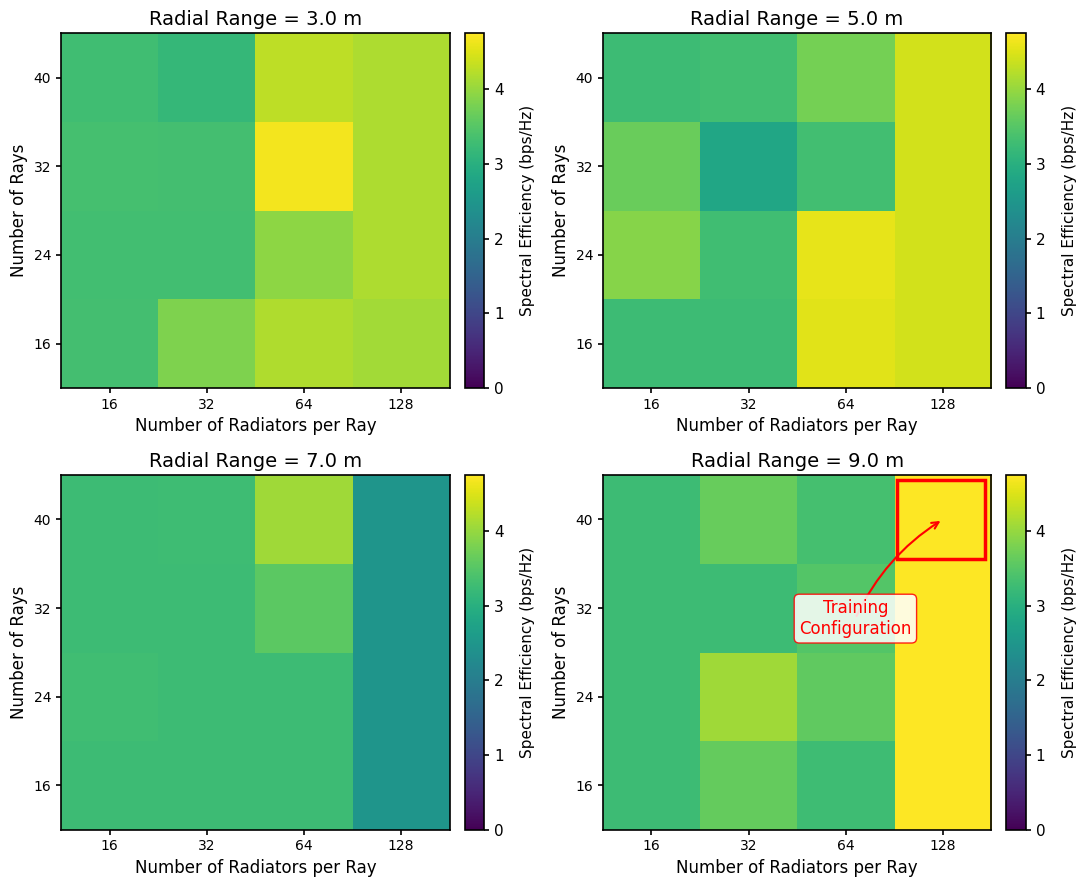

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({
    'font.size': 11, 'axes.linewidth': 1.2,
    'xtick.major.width': 1.2, 'ytick.major.width': 1.2,
    'axes.labelsize': 12, 'axes.titlesize': 14
})

vmin, vmax = 0, pfm_ub_mean
# vmin, vmax = pfm_mean_3d.min(), pfm_mean_3d.max()
# vmin, vmax = 0, 1
fig, axes = plt.subplots(2, 2, figsize=(11, 9))
highlight_color = 'red'
highlight_lw = 2.5

for idx, (r, ax) in enumerate(zip(radial_range_tab, axes.flat)):
    data = pfm_mean_3d[idx, :, :]
    im = ax.imshow(data, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
    ax.set_xticks(range(len(n_samples_tab)))
    ax.set_xticklabels(n_samples_tab, fontsize=10)
    ax.set_yticks(range(len(n_rays_tab)))
    ax.set_yticklabels(n_rays_tab, fontsize=10)
    ax.set_xlabel('Number of Radiators per Ray', fontsize=12)
    ax.set_ylabel('Number of Rays', fontsize=12)
    ax.set_title(f'Radial Range = {r} m', fontsize=14)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = plt.colorbar(im, cax=cax, shrink=0.95)
    cbar.set_label('Spectral Efficiency (bps/Hz)', rotation=90, labelpad=12, fontsize=11)

    if r == '9.0':
        rect_row, rect_col = 3, 3
        rect = patches.Rectangle(
            (rect_col - 0.47, rect_row - 0.45), 0.9, 0.9,
            linewidth=highlight_lw, edgecolor=highlight_color,
            facecolor='none', linestyle='-', zorder=5
        )
        ax.add_patch(rect)

        ax.annotate(
            'Training\nConfiguration',
            xy=(rect_col, rect_row),
            xytext=(0.65, 0.65), textcoords='axes fraction',
            arrowprops=dict(
                arrowstyle='->', color=highlight_color, lw=1.5,
                connectionstyle='arc3,rad=-0.15', patchA=None, patchB=None
            ),
            fontsize=12, color=highlight_color,
            ha='center', va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white",
                      edgecolor=highlight_color, alpha=0.85),
            zorder=6
        )

# plt.subplots_adjust(left=0.08, right=0.88, top=0.92, bottom=0.08, wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()

### 2.5.1 SE evaluation for different envs

In [29]:
from eval import *

band = 2.4
filter = 'sd'

SCENE_PATHS = {
    'conferenceroom': './performance/conferenceroom',
    'bedroom': './performance/bedroom',
    'office': './performance/office',
}
METHOD_PATH_TEMPLATES = {
    'F4CKM': '{scene_path}/{band}GHz_SF_FB_{filter}.npy',
    'NeWRF': './performance/NeWRF/{band}GHz_MIMO_NeWRF_{scene}.npy',
    'NeRF2': './performance/NeRF2/{band}GHz_MIMO_NeRF2_{scene}.npy',
    'FIRE': './performance/FIRE/{band}GHz_MIMO_FIRE_{scene}.npy',
}
results = {}
for scene in SCENE_PATHS:
    path = f"{SCENE_PATHS[scene]}/SE_perfectCSI.npy"
    rate_ub = load_performance(path, 'rate')
    results[f'rate_list_{scene}_ub'] = rate_ub
for scene in SCENE_PATHS:
    for method in METHOD_PATH_TEMPLATES:
        band_str = '2.4'
        path = METHOD_PATH_TEMPLATES[method].format(
            scene_path=SCENE_PATHS[scene], band=band_str, filter=filter, scene=scene)
        rate = load_performance(path, 'rate')
        prefix = 'f4ckm' if method == 'F4CKM' else method.lower()
        results[f'rate_list_{scene}_{prefix}'] = rate
globals().update(results)

==> Simulation results loaded successfully from: ./performance/conferenceroom/SE_perfectCSI.npy
==> Simulation results loaded successfully from: ./performance/bedroom/SE_perfectCSI.npy
==> Simulation results loaded successfully from: ./performance/office/SE_perfectCSI.npy
==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/FIRE/2.4GHz_MIMO_FIRE_conferenceroom.npy
==> Simulation results loaded successfully from: ./performance/bedroom/2.4GHz_SF_FB_sd.npy
==> Simulation results loaded successfully from: ./performance/NeWRF/2.4GHz_MIMO_NeWRF_bedroom.npy
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom.npy
==> Simulation results l

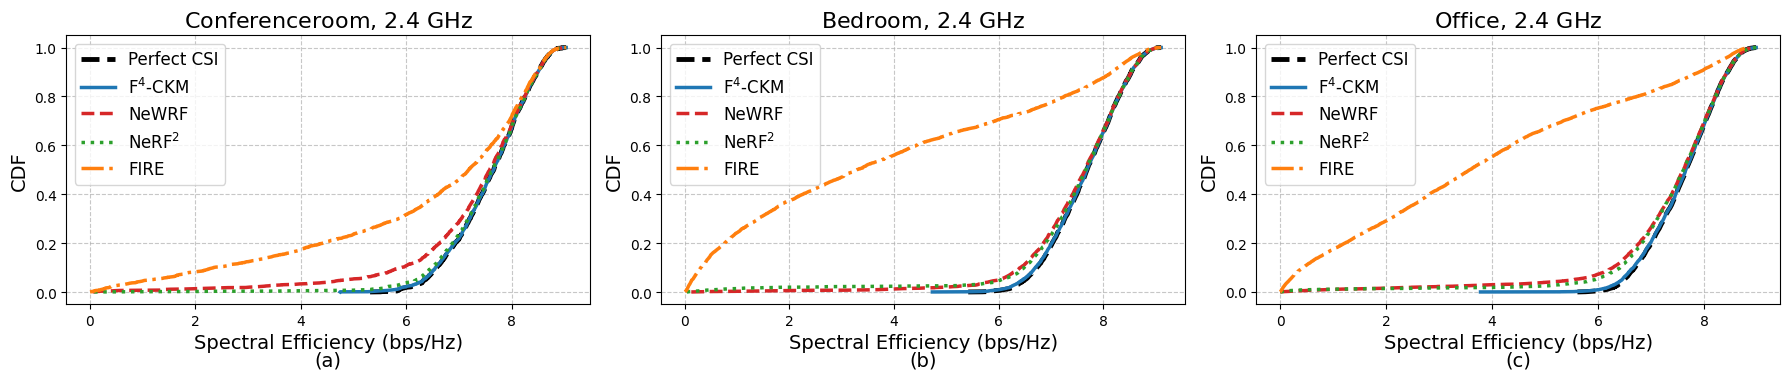

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from visualizer import StyleManager

methods = ['F4CKM', 'NeWRF', 'NeRF2', 'FIRE']
scenes = ['Conferenceroom', 'Bedroom', 'Office']
data = {}
for method in methods:
    data[method] = {}
    for scene in scenes:
        prefix = 'f4ckm' if method == 'F4CKM' else method.lower()
        rate_list = globals()[f'rate_list_{scene.lower()}_{prefix}']
        data[method][scene] = {'SE': rate_list}
        cdf_x, cdf_y = cal_cdf(rate_list)
        data[method][scene]['SE_cdf'] = (cdf_x, cdf_y)

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
labels = ['(a)', '(b)', '(c)']
for col, scene in enumerate(scenes):
    ax = axs[col]
    scene_key = scene.lower().replace(' ', '')
    rate_ub = globals()[f'rate_list_{scene_key}_ub']
    cdf_x_ub, cdf_y_ub = cal_cdf(rate_ub)
    ax.plot(cdf_x_ub, cdf_y_ub, '--', color='black', linewidth=3.5, label=r'Perfect CSI')
    for i, method in enumerate(methods):
        cdf_x, cdf_y = data[method][scene]['SE_cdf']
        style = StyleManager.get_style(i)
        ax.plot(cdf_x, cdf_y, linestyle=style['linestyle'], color=style['color'], linewidth=2.5,
                label=['F$^4$-CKM', 'NeWRF', 'NeRF$^2$', 'FIRE'][i])
    ax.set_xlabel('Spectral Efficiency (bps/Hz)', fontsize=14)
    ax.set_ylabel('CDF', fontsize=14)
    ax.set_title(f'{scene}, $2.4$ GHz', fontsize=16)
    ax.grid(linestyle='--', alpha=0.7)
    ax.legend(loc=2, fontsize=12)
    ax.text(0.5, -0.23, labels[col], transform=ax.transAxes, fontsize=14, ha='center')
plt.tight_layout()
# plt.savefig('./Figures/sim_envs_rate.pdf', format='pdf')
plt.show()

### 3.7 channel gain map

In [2]:

path_conf = './performance/conferenceroom/2.4GHz_SF_FB_CGM.npy'
pos_list_conf, gain_pred_list_conf, gain_gt_list_conf = load_performance(path_conf, 'cgm')
abs_error_conf = np.abs(gain_pred_list_conf - gain_gt_list_conf)
mae_conf = np.mean(abs_error_conf)
print('Conference Room MAE (dB): ', mae_conf)
result_conf = build_heatmap_from_samples(
    pos_list=pos_list_conf,
    gain_pred=gain_pred_list_conf,
    gain_gt=gain_gt_list_conf,
    fc=2.4e9,
    fill_value=-80.0
)
path_bed = './performance/bedroom/2.4GHz_SF_FB_CGM.npy'
pos_list_bed, gain_pred_list_bed, gain_gt_list_bed = load_performance(path_bed, 'cgm')
abs_error_bed = np.abs(gain_pred_list_bed - gain_gt_list_bed)
mae_bed = np.mean(abs_error_bed)
print('Bedroom MAE (dB): ', mae_bed)
result_bed = build_heatmap_from_samples(
    pos_list=pos_list_bed,
    gain_pred=gain_pred_list_bed,
    gain_gt=gain_gt_list_bed,
    fc=2.4e9,
    fill_value=-80.0
)
path_office = './performance/office/2.4GHz_SF_FB_CGM.npy'
pos_list_office, gain_pred_list_office, gain_gt_list_office = load_performance(path_office, 'cgm')
abs_error_office = np.abs(gain_pred_list_office - gain_gt_list_office)
mae_office = np.mean(abs_error_office)
print('Office MAE (dB): ', mae_office)
result_office = build_heatmap_from_samples(
    pos_list=pos_list_office,
    gain_pred=gain_pred_list_office,
    gain_gt=gain_gt_list_office,
    fc=2.4e9,
    fill_value=-80.0
)

# NeRF2
path_conf = './performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom_CGM.npy'
pos_list_conf_nerf2, gain_pred_list_conf_nerf2, gain_gt_list_conf_nerf2 = load_performance(path_conf, 'cgm')
abs_error_conf_nerf2 = np.abs(gain_pred_list_conf_nerf2 - gain_gt_list_conf_nerf2)
mae_conf_nerf2 = np.mean(abs_error_conf_nerf2)
print('Conference Room MAE (dB) NeRF2: ', mae_conf_nerf2)
result_conf_nerf2 = build_heatmap_from_samples(
    pos_list=pos_list_conf_nerf2,
    gain_pred=gain_pred_list_conf_nerf2,
    gain_gt=gain_gt_list_conf_nerf2,
    fc=2.4e9,
    fill_value=-80.0
)
path_bed = './performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom_CGM.npy'
pos_list_bed_nerf2, gain_pred_list_bed_nerf2, gain_gt_list_bed_nerf2 = load_performance(path_bed, 'cgm')
abs_error_bed_nerf2 = np.abs(gain_pred_list_bed_nerf2 - gain_gt_list_bed_nerf2)
mae_bed_nerf2 = np.mean(abs_error_bed_nerf2)
print('Bedroom MAE (dB) NeRF2: ', mae_bed_nerf2)
result_bed_nerf2 = build_heatmap_from_samples(
    pos_list=pos_list_bed_nerf2,
    gain_pred=gain_pred_list_bed_nerf2,
    gain_gt=gain_gt_list_bed_nerf2,
    fc=2.4e9,
    fill_value=-80.0
)
path_office = './performance/NeRF2/2.4GHz_MIMO_NeRF2_office_CGM.npy'
pos_list_office_nerf2, gain_pred_list_office_nerf2, gain_gt_list_office_nerf2 = load_performance(path_office, 'cgm')
abs_error_office_nerf2 = np.abs(gain_pred_list_office_nerf2 - gain_gt_list_office_nerf2)
mae_office_nerf2 = np.mean(abs_error_office_nerf2)
print('Office MAE (dB) NeRF2: ', mae_office_nerf2)
result_office_nerf2 = build_heatmap_from_samples(
    pos_list=pos_list_office_nerf2,
    gain_pred=gain_pred_list_office_nerf2,
    gain_gt=gain_gt_list_office_nerf2,
    fc=2.4e9,
    fill_value=-80.0
)

==> Simulation results loaded successfully from: ./performance/conferenceroom/2.4GHz_SF_FB_CGM.npy
Conference Room MAE (dB):  0.23138
Heatmap grid: 22 × 22
Sampled points: 484 → Mapped: 484
==> Simulation results loaded successfully from: ./performance/bedroom/2.4GHz_SF_FB_CGM.npy
Bedroom MAE (dB):  1.0490533
Heatmap grid: 36 × 38
Sampled points: 1305 → Mapped: 1368
==> Simulation results loaded successfully from: ./performance/office/2.4GHz_SF_FB_CGM.npy
Office MAE (dB):  0.7964674
Heatmap grid: 62 × 38
Sampled points: 2242 → Mapped: 2356
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_conferenceroom_CGM.npy
Conference Room MAE (dB) NeRF2:  6.787905
Heatmap grid: 22 × 22
Sampled points: 484 → Mapped: 484
==> Simulation results loaded successfully from: ./performance/NeRF2/2.4GHz_MIMO_NeRF2_bedroom_CGM.npy
Bedroom MAE (dB) NeRF2:  3.6303053
Heatmap grid: 36 × 38
Sampled points: 1305 → Mapped: 1368
==> Simulation results loaded successfully from: .

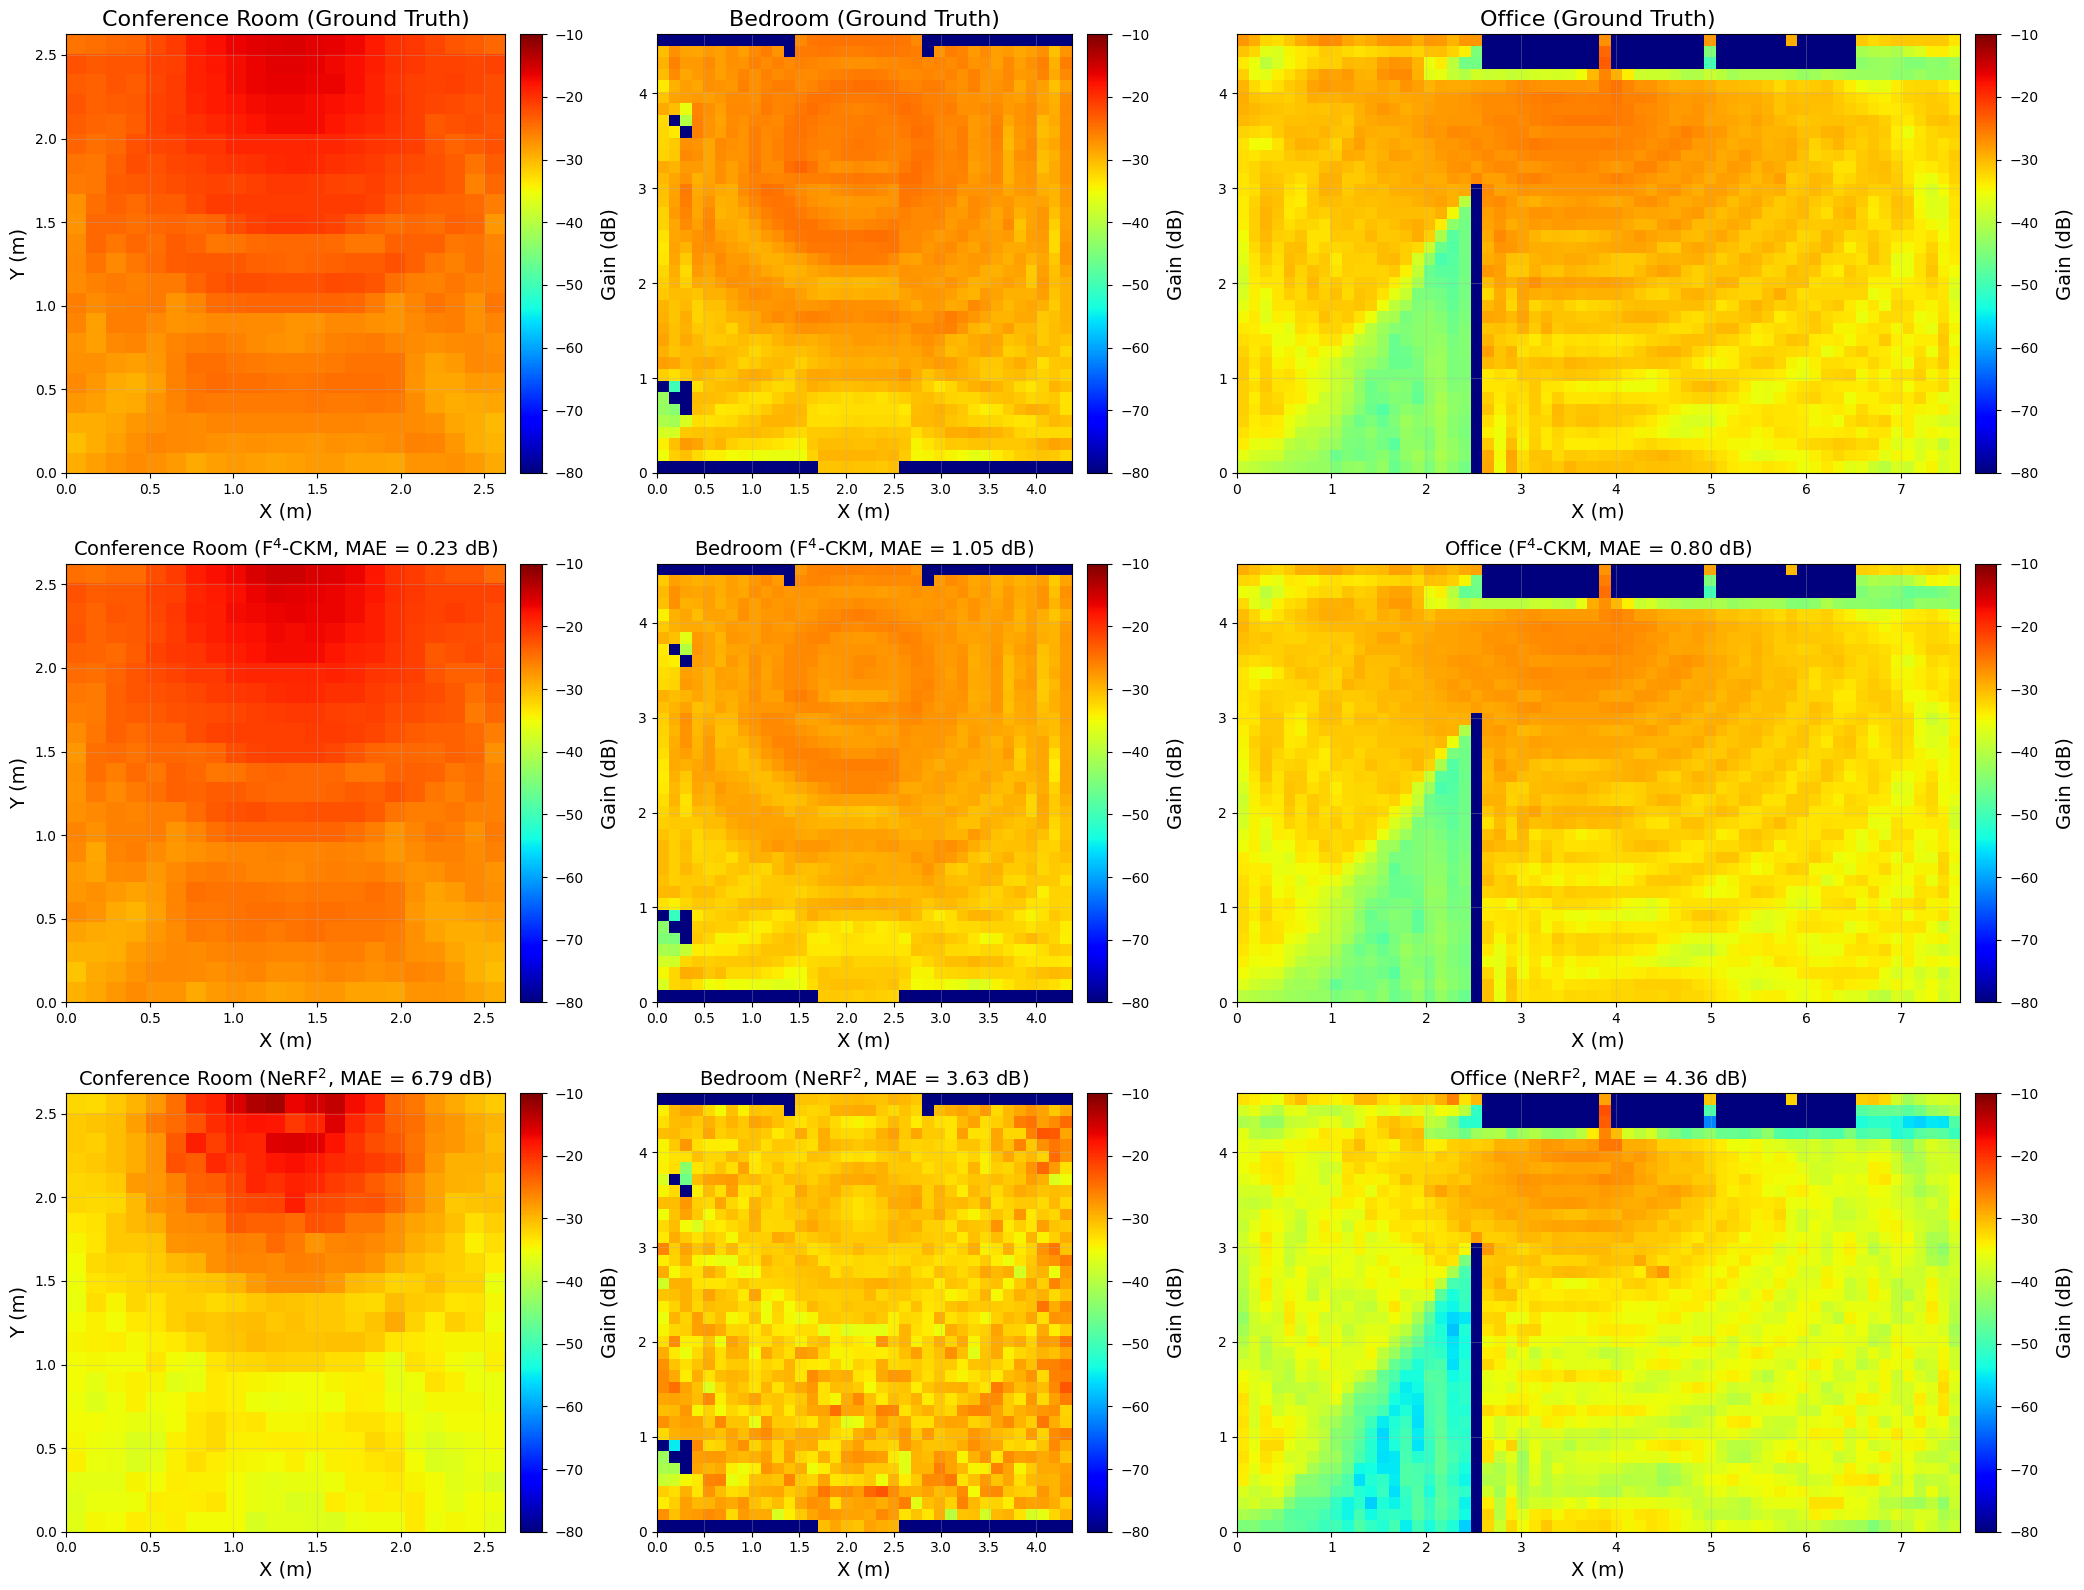

In [53]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 原方法
scenes = [
    {'name': 'Conference Room', 'result': result_conf},
    {'name': 'Bedroom',         'result': result_bed},
    {'name': 'Office',          'result': result_office},
]
maes = [mae_conf, mae_bed, mae_office]

# NeRF2方法
scenes_nerf2 = [
    {'name': 'Conference Room', 'result': result_conf_nerf2},
    {'name': 'Bedroom',         'result': result_bed_nerf2},
    {'name': 'Office',          'result': result_office_nerf2},
]
maes_nerf2 = [mae_conf_nerf2, mae_bed_nerf2, mae_office_nerf2]

# 计算宽高比
widths = []
for scene in scenes:
    ext = scene['result']['extent']
    w = ext[1] - ext[0]
    h = ext[3] - ext[2]
    widths.append(w / h)
total_width = sum(widths)
widths = [w / total_width for w in widths]

ncols = len(scenes)
fig, axes = plt.subplots(3, ncols, figsize=(21, 16), gridspec_kw={'width_ratios': widths})

for i in range(ncols):
    # 第一行：GT
    res = scenes[i]['result']
    ax_top = axes[0, i]
    im1 = ax_top.imshow(
        res['gain_gt_map'],
        cmap='jet',
        extent=res['extent'],
        vmin=res['fill_value'],
        vmax=-10
    )
    ax_top.set_title(f"{scenes[i]['name']} (Ground Truth)", fontsize=16)
    ax_top.set_xlabel('X (m)', fontsize=14)
    if i == 0:
        ax_top.set_ylabel('Y (m)', fontsize=14)
    ax_top.grid(True, alpha=0.3)
    divider_top = make_axes_locatable(ax_top)
    size = "3%" if scenes[i]["name"] == "Office" else "5%"
    cax_top = divider_top.append_axes("right", size=size, pad=0.15)
    cbar1 = fig.colorbar(im1, cax=cax_top)
    cbar1.set_label('Gain (dB)', fontsize=14, labelpad=12, loc='center')
    cax_top.yaxis.set_label_position('right')
    cax_top.tick_params(labelsize=10, pad=6)

    # 第二行：原方法 Pred
    ax_mid = axes[1, i]
    im2 = ax_mid.imshow(
        res['gain_pred_map'],
        cmap='jet',
        extent=res['extent'],
        vmin=res['fill_value'],
        vmax=-10
    )
    ax_mid.set_title(f"{scenes[i]['name']} (F$^4$-CKM, MAE = {maes[i]:.2f} dB)", fontsize=14)
    ax_mid.set_xlabel('X (m)', fontsize=14)
    if i == 0:
        ax_mid.set_ylabel('Y (m)', fontsize=14)
    ax_mid.grid(True, alpha=0.3)
    divider_mid = make_axes_locatable(ax_mid)
    size = "3%" if scenes[i]["name"] == "Office" else "5%"
    cax_mid = divider_mid.append_axes("right", size=size, pad=0.15)
    cbar2 = fig.colorbar(im2, cax=cax_mid)
    cbar2.set_label('Gain (dB)', fontsize=14, labelpad=12, loc='center')
    cax_mid.yaxis.set_label_position('right')
    cax_mid.tick_params(labelsize=10, pad=6)

    # 第三行：NeRF2 Pred
    res_nerf2 = scenes_nerf2[i]['result']
    ax_bot = axes[2, i]
    im3 = ax_bot.imshow(
        res_nerf2['gain_pred_map'],
        cmap='jet',
        extent=res_nerf2['extent'],
        vmin=res_nerf2['fill_value'],
        vmax=-10
    )
    ax_bot.set_title(f"{scenes_nerf2[i]['name']} (NeRF$^2$, MAE = {maes_nerf2[i]:.2f} dB)", fontsize=14)
    ax_bot.set_xlabel('X (m)', fontsize=14)
    if i == 0:
        ax_bot.set_ylabel('Y (m)', fontsize=14)
    ax_bot.grid(True, alpha=0.3)
    divider_bot = make_axes_locatable(ax_bot)
    size = "3%" if scenes_nerf2[i]["name"] == "Office" else "5%"
    cax_bot = divider_bot.append_axes("right", size=size, pad=0.15)
    cbar3 = fig.colorbar(im3, cax=cax_bot)
    cbar3.set_label('Gain (dB)', fontsize=14, labelpad=12, loc='center')
    cax_bot.yaxis.set_label_position('right')
    cax_bot.tick_params(labelsize=10, pad=6)

plt.tight_layout()
# plt.savefig('./Figures/sim_cgm_compare.pdf', format='pdf')
plt.show()

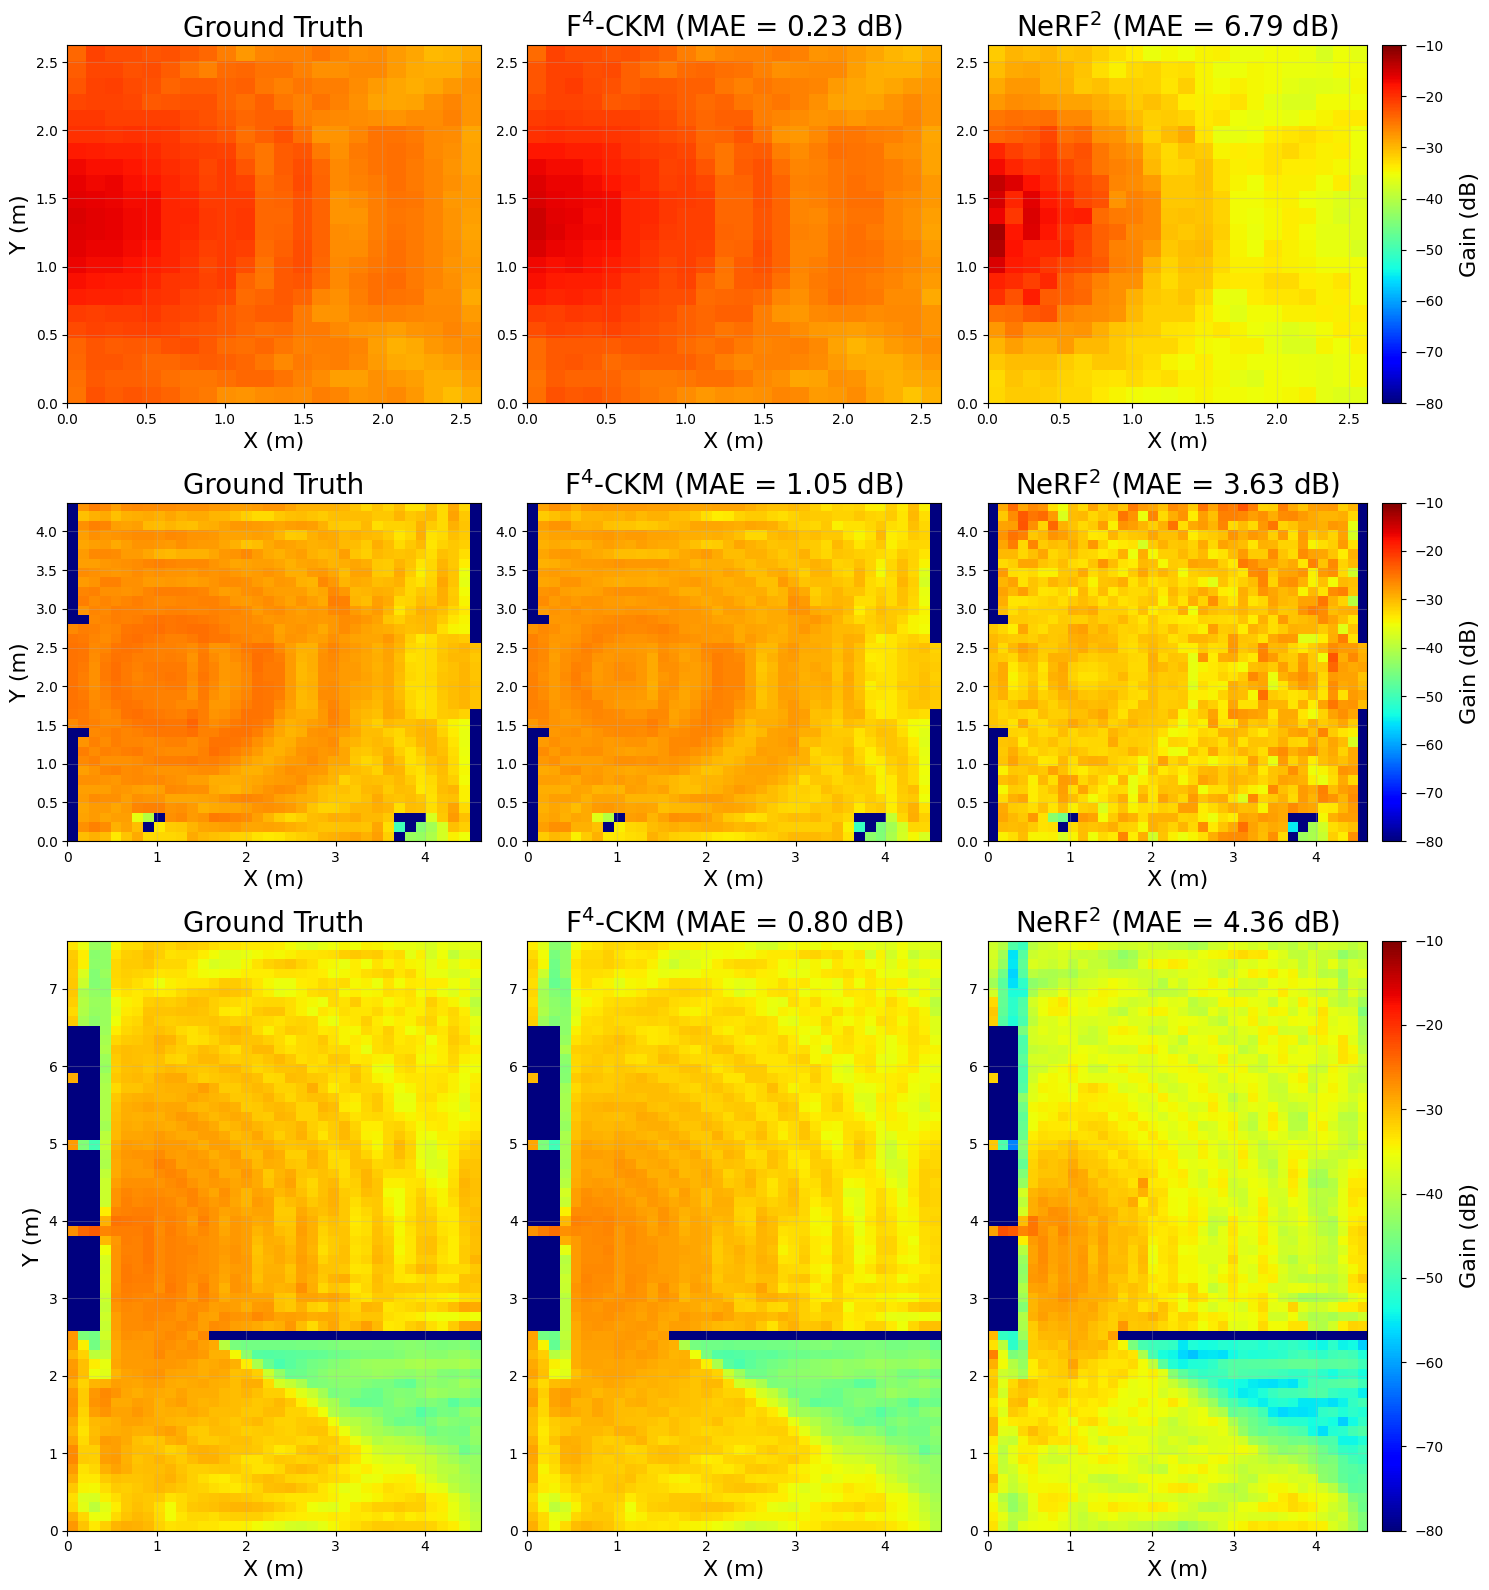

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

scenes = [
    {'name': 'Conference Room', 'result': result_conf, 'mae': mae_conf, 'result_nerf2': result_conf_nerf2, 'mae_nerf2': mae_conf_nerf2},
    {'name': 'Bedroom',         'result': result_bed,  'mae': mae_bed,  'result_nerf2': result_bed_nerf2,  'mae_nerf2': mae_bed_nerf2},
    {'name': 'Office',          'result': result_office,'mae': mae_office,'result_nerf2': result_office_nerf2,'mae_nerf2': mae_office_nerf2},
]

methods = ['Ground Truth', 'F$^4$-CKM', 'NeRF$^2$']

heights = []
for scene in scenes:
    ext = scene['result']['extent']
    w = ext[1] - ext[0]
    h = ext[3] - ext[2]
    heights.append(h / w)
total_height = sum(heights)
heights = [h / total_height for h in heights]

nrows = len(scenes)
ncols = len(methods)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 16), gridspec_kw={'height_ratios': heights})

for i, scene in enumerate(scenes):
    for j, method in enumerate(methods):
        ax = axes[i, j]
        if method == 'Ground Truth':
            data = scene['result']['gain_gt_map']
            extent = scene['result']['extent']
            vmin = scene['result']['fill_value']
            title = f"Ground Truth"
        elif method == 'F$^4$-CKM':
            data = scene['result']['gain_pred_map']
            extent = scene['result']['extent']
            vmin = scene['result']['fill_value']
            title = f"F$^4$-CKM (MAE = {scene['mae']:.2f} dB)"
        else:  # NeRF2
            data = scene['result_nerf2']['gain_pred_map']
            extent = scene['result_nerf2']['extent']
            vmin = scene['result_nerf2']['fill_value']
            title = f"NeRF$^2$ (MAE = {scene['mae_nerf2']:.2f} dB)"

        im = ax.imshow(
            data,
            cmap='jet',
            extent=extent,
            origin='lower',
            vmin=vmin,
            vmax=-10,
            aspect='auto'
        )
        ax.set_title(title, fontsize=20)
        ax.set_xlabel('X (m)', fontsize=16)
        if j == 0:
            ax.set_ylabel('Y (m)', fontsize=16)
        ax.grid(True, alpha=0.3)
        if j == ncols - 1:
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.15)
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label('Gain (dB)', fontsize=16, labelpad=12, loc='center')
            cax.yaxis.set_label_position('right')
            cax.tick_params(labelsize=10, pad=6)

plt.tight_layout()
# plt.savefig('./Figures/sim_cgm_compare_T.pdf', format='pdf')
plt.show()